________________________________________
# **Project Overview**
________________________________________
This project aims to analyze e-commerce sales data to uncover insights into sales performance, product category trends, seasonality, and customer preferences. By exploring patterns in order fulfillment, promotions, and geographic sales distribution, the project will provide actionable recommendations to help businesses optimize marketing strategies, enhance customer targeting, and boost sales performance.

**Scope of the Project:**

The analysis is designed to be exhaustive and insights-driven, covering detailed descriptive and inferential investigations. The goal is to explore the dataset to extract meaningful trends, test hypotheses, and derive data-driven insights that contribute to business decision-making processes.

## **Key Areas of Focus**
**Sales Performance Analysis:**

- Evaluating total sales, revenue, and order quantity.
- Identifying top-performing product categories, SKUs, and sales channels.
- Measuring average order value and revenue trends.

**Seasonality and Time Trends:**

- Uncovering monthly and seasonal trends in sales performance.
- Analyzing peak sales periods and high cancellation months.

**Customer and Geographic Insights:**

- Analyzing customer behavior based on location (city/state).
- Understanding the relationship between shipping service levels and geographic regions.

**Promotions and Discounts:**

- Evaluating the impact of promotions on order volume and revenue.
- Comparing performance between promoted and non-promoted orders.

**Order Fulfillment Insights:**

- Assessing the differences in performance between orders fulfilled by Amazon and merchants.
- Analyzing the impact of shipping service levels (Standard vs. Expedited) on sales performance.

**Inferential Analysis and Hypothesis Testing:**

*Testing relationships and significant differences across key variables:*
- Promotion effectiveness
- Fulfillment method impact
- Geographic variations in sales and cancellations


### **Expected Outcomes**

*By conducting this analysis, the project will deliver:*

- Comprehensive insights into sales trends, customer preferences, and product performance.
- Key findings on the effectiveness of promotions, fulfillment strategies, and time-based sales patterns.
- Data-driven recommendations to optimize marketing strategies, reduce cancellations, and improve sales performance.

**Business Impact:**

*The findings will empower businesses to:*

- Improve product targeting and inventory management.
- Enhance marketing strategies through insights on seasonality and promotions.
- Optimize fulfillment methods to increase customer satisfaction and reduce cancellations.
- Identify high-performing categories and target locations to maximize revenue growth.
**Tools and Techniques**

*The project will employ:*

- Data Analysis: Python (Pandas, NumPy), statistical methods, and hypothesis testing.
- Visualization: Matplotlib, Seaborn for trends and distribution analysis.
- Statistical Tests: Comparative tests, correlation analysis, and significance testing.
- Reporting: Actionable insights with visualized results for clarity and decision-making.



________________________________________
## Imports
________________________________________

In [98]:
# Standard Data Science Toolkit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.style.use("ggplot")
import seaborn as sns

# Inferential Statistical Tests
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

________________________________________
## Data
________________________________________

In [99]:
file_path = "cleaned_ecommerce_data.csv"

ecommerce_data = pd.read_csv(file_path)

ecommerce_data.head()


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
1,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,...,1,INR,399.0,HYDERABAD,TELANGANA,500032.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,12,405-5513694-8146768,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-XS,kurta,...,1,INR,399.0,Amravati.,MAHARASHTRA,444606.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
3,14,408-1298370-1920302,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0351,J0351-SET-L,Set,...,1,INR,771.0,MUMBAI,MAHARASHTRA,400053.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
4,15,403-4965581-9520319,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,PJNE3368,PJNE3368-KR-6XL,kurta,...,1,INR,544.0,GUNTAKAL,ANDHRA PRADESH,515801.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship


In [100]:
ecommerce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32395 entries, 0 to 32394
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               32395 non-null  int64  
 1   Order ID            32395 non-null  object 
 2   Date                32395 non-null  object 
 3   Status              32395 non-null  object 
 4   Fulfilment          32395 non-null  object 
 5   Sales Channel       32395 non-null  object 
 6   ship-service-level  32395 non-null  object 
 7   Style               32395 non-null  object 
 8   SKU                 32395 non-null  object 
 9   Category            32395 non-null  object 
 10  Size                32395 non-null  object 
 11  ASIN                32395 non-null  object 
 12  Courier Status      32395 non-null  object 
 13  Qty                 32395 non-null  int64  
 14  currency            32395 non-null  object 
 15  Amount              32395 non-null  float64
 16  ship

In [101]:
ecommerce_data.describe()

,index,Qty,Amount,ship-postal-code
count,32395.000000,32395.000000,32395.000000,32395.000000
mean,60956.478160,1.004846,650.522920,462097.701096
std,36843.686311,0.085035,284.913465,194276.943115
min,1.000000,1.000000,0.000000,110001.000000
25%,27188.500000,1.000000,459.000000,370001.000000
50%,63461.000000,1.000000,631.000000,500017.000000
75%,91761.500000,1.000000,771.000000,600037.000000
max,128891.000000,5.000000,5495.000000,855115.000000


- Qty (quantity): Average 1.00, maximum 5.00.
- Amount (amount): Average 650.52, standard deviation 284.91, maximum 5,495.00.
- Ship-postal-code: Average 462097.70.

________________________________________
# Descriptive Analysis Questions
________________________________________
| **Category**                   | **Questions**                                                                                   |
|--------------------------------|-----------------------------------------------------------------------------------------------|
| **General Sales Insights**     | 1. What is the total number of orders placed?                                                |
|                                | 2. What is the total revenue generated?                                                     |
|                                | 3. What is the average order value across all orders?                                       |
|                                | 4. What are the top 10 best-selling product categories by total sales?                      |
|                                | 5. Which SKUs (product codes) have the highest total quantity sold?                         |
|                                | 6. Which SKUs generate the highest revenue?                                                |
|                                | 7. What are the monthly sales trends over time? (group by Date)                             |
|                                | 8. Which fulfillment method (Fulfilment) contributes the most to sales?                     |
|                                | 9. What is the distribution of Status (shipped, canceled, etc.)?                            |
|                                | 10. Which Sales Channel generates the most sales and revenue?                               |
|                                | 11. What is the average order quantity (Qty) across different categories?                   |
| **Seasonality & Time Trends**  | 12. What are the peak sales months and seasons?                                             |
|                                | 13. Is there a weekly or daily pattern in sales volume?                                     |
|                                | 14. Which months show the highest cancellation rates?                                       |
| **Customer Location Trends**   | 15. Which ship-city and ship-state have the most orders?                                    |
|                                | 16. What is the average revenue per shipping state or city?                                 |
|                                | 17. Which states or cities have the highest cancellation rates?                             |
| **Promotions & Discounts**     | 18. How many orders included promotion-ids?                                                 |
|                                | 19. What is the average revenue of promoted vs. non-promoted orders?                        |
|                                | 20. Which promotions were the most frequently used?                                         |
| **Fulfillment Methods**        | 21. What is the split between orders fulfilled by Amazon and merchants?                     |
|                                | 22. What is the average order value for Amazon-fulfilled orders vs. Merchant-fulfilled?     |
|                                | 23. What is the distribution of ship-service-level (Standard vs. Expedited)?                |


In [102]:
#1.What is the total number of orders placed?
total_orders = len(ecommerce_data)
print("Total number of orders placed:", total_orders)


Total number of orders placed: 32395


In [103]:
#2.What is the total revenue generated?
total_revenue = ecommerce_data['Amount'].sum()
print("Total revenue generated:", total_revenue)


Total revenue generated: 21073690.0


In [104]:
#3.What is the average order value across all orders?
average_order_value = ecommerce_data['Amount'].mean()
print("Average Order Value:", round(average_order_value, 2))

Average Order Value: 650.52


In [105]:
#4.What are the top 10 best-selling product categories by total sales?
top_categories = ecommerce_data.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(10)
print("Top 10 Best-Selling Product Categories by Total Sales:")
print(top_categories)

Top 10 Best-Selling Product Categories by Total Sales:
Category
Set              10020659.0
kurta             5281253.0
Western Dress     4355042.0
Top               1070390.0
Ethnic Dress       178964.0
Blouse              93390.0
Bottom              54067.0
Saree               19925.0
Name: Amount, dtype: float64


In [106]:
#5.Which SKUs (product codes) have the highest total quantity sold?
top_skus = ecommerce_data.groupby('SKU')['Qty'].sum().sort_values(ascending=False).head(20)
print("Top 20 SKUs with the Highest Total Quantity Sold:")
print(top_skus)

Top 20 SKUs with the Highest Total Quantity Sold:
SKU
JNE3797-KR-L        456
JNE3797-KR-M        423
JNE3797-KR-S        307
SET183-KR-DH-M      288
JNE3797-KR-XL       284
JNE3797-KR-XXL      192
JNE3797-KR-XXXL     180
J0003-SET-M         179
JNE3797-KR-XS       169
JNE3405-KR-M        161
J0003-SET-XL        103
J0003-SET-XXL        97
J0341-DR-M           96
J0003-SET-L          94
J0003-SET-S          90
JNE3798-KR-M         89
JNE3798-KR-XL        89
J0341-DR-L           88
SET324-KR-NP-M       86
SET397-KR-NP  -M     81
Name: Qty, dtype: int64


In [107]:
#6.Which SKUs generate the highest revenue?
top_revenue_skus = ecommerce_data.groupby('SKU')['Amount'].sum().sort_values(ascending=False).head(10)
print("Top 10 SKUs Generating the Highest Revenue:")
print(top_revenue_skus)

Top 10 SKUs Generating the Highest Revenue:
SKU
JNE3797-KR-L        329992.0
JNE3797-KR-M        305375.0
JNE3797-KR-S        224607.0
SET183-KR-DH-M      217050.0
JNE3797-KR-XL       210574.0
JNE3797-KR-XXL      135132.0
JNE3797-KR-XXXL     132219.0
JNE3797-KR-XS       125019.0
J0003-SET-M         117322.0
SET397-KR-NP  -M     86632.0
Name: Amount, dtype: float64


In [108]:
#7.What are the monthly sales trends over time? (group by Date)

ecommerce_data['Date'] = pd.to_datetime(ecommerce_data['Date'], errors='coerce')

ecommerce_data['Year-Month'] = ecommerce_data['Date'].dt.to_period('M')

monthly_sales_trends = ecommerce_data.groupby('Year-Month')['Amount'].sum().reset_index()

monthly_sales_trends['Year-Month'] = monthly_sales_trends['Year-Month'].astype(str)

print("Monthly Sales Trends:")
print(monthly_sales_trends)



Monthly Sales Trends:
  Year-Month     Amount
0    2022-03    10797.0
1    2022-04  8020286.0
2    2022-05  7415300.0
3    2022-06  5627307.0


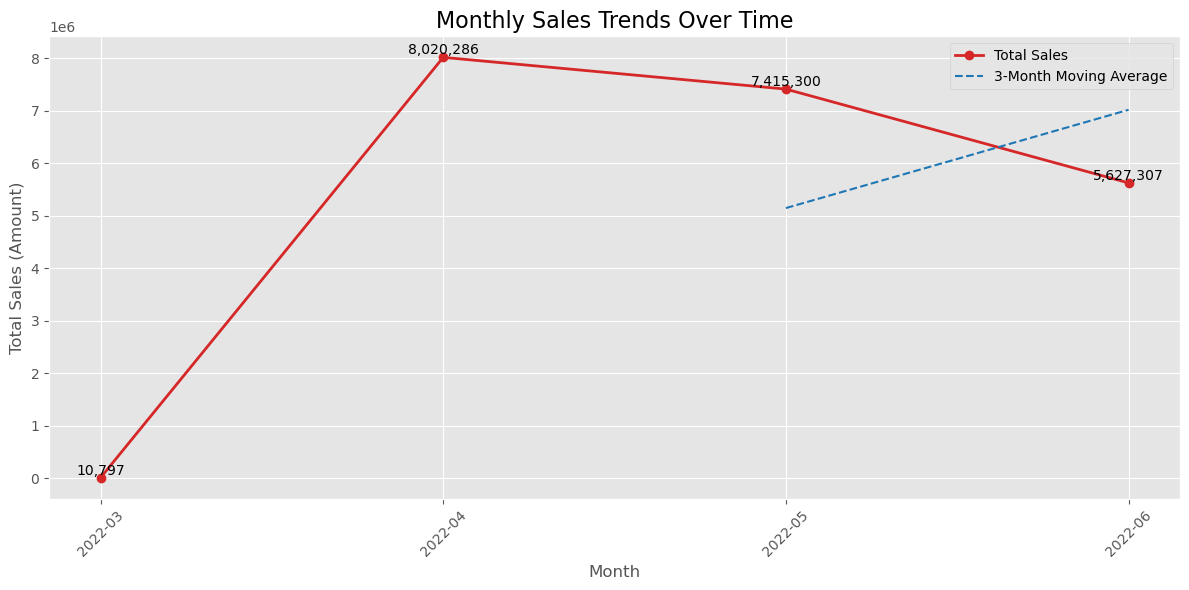

In [109]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 6))


plt.plot(monthly_sales_trends['Year-Month'], monthly_sales_trends['Amount'], marker='o', linestyle='-', color='tab:red', linewidth=2, label='Total Sales')


monthly_sales_trends['Moving Average'] = monthly_sales_trends['Amount'].rolling(window=3).mean()
plt.plot(monthly_sales_trends['Year-Month'], monthly_sales_trends['Moving Average'], linestyle='--', color='tab:blue', label='3-Month Moving Average')


plt.xticks(rotation=45)
plt.title("Monthly Sales Trends Over Time", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales (Amount)", fontsize=12)


for i in range(len(monthly_sales_trends)):
    plt.text(monthly_sales_trends['Year-Month'][i], monthly_sales_trends['Amount'][i], f'{monthly_sales_trends["Amount"][i]:,.0f}', ha='center', va='bottom')


plt.grid(True)
plt.legend()


plt.tight_layout()
plt.show()


 - The red line represents the total sales amount for each month from March 2022 to June 2022. There is a significant spike in April 2022, where the sales reached 8,020,286. Following that peak, sales decline and stabilize by June 2022 at 5,627,307.
 - 3-Month Moving Average (Blue Dashed Line): The dashed blue line shows the 3-month moving average of the sales, which smooths out the fluctuations in the data to show the trend more clearly.

In [110]:
#8.Which fulfillment method (Fulfilment) contributes the most to sales?

fulfilment_sales = ecommerce_data.groupby('Fulfilment')['Amount'].sum().reset_index()

fulfilment_sales = fulfilment_sales.sort_values(by='Amount', ascending=False)

print("Sales Contribution by Fulfilment Method:")
print(fulfilment_sales)

Sales Contribution by Fulfilment Method:
  Fulfilment      Amount
0   Merchant  21073690.0


In [111]:
#9.What is the distribution of Status?
status_distribution = ecommerce_data['Status'].value_counts()
print("Distribution of Order Status:")
print(status_distribution)

Distribution of Order Status:
Status
Shipped - Delivered to Buyer     28754
Shipped - Returned to Seller      1947
Shipped - Picked Up                973
Pending - Waiting for Pick Up      281
Pending                            243
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64


C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_6192\4171158543.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_status.index, y=filtered_status.values, palette="Set2")


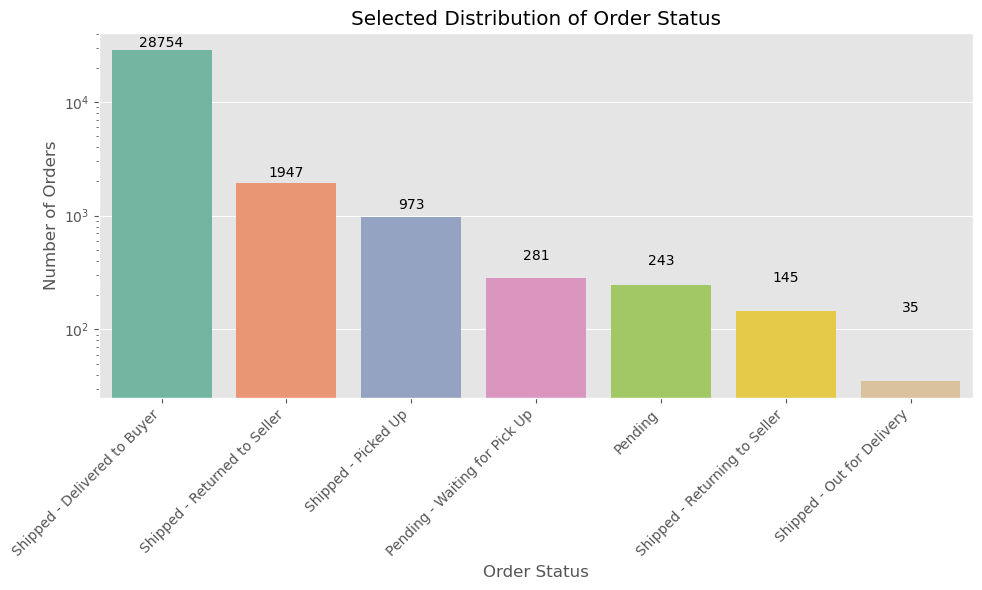

In [112]:

import matplotlib.pyplot as plt
import seaborn as sns

# List of selected statuses to analyze
selected_status = ['Shipped - Delivered to Buyer', 'Shipped - Returned to Seller',
                   'Shipped - Picked Up', 'Pending - Waiting for Pick Up',
                   'Pending', 'Shipped - Returning to Seller', 'Shipped - Out for Delivery']

# Assuming 'status_distribution' is a pandas Series with order statuses as the index and their counts as values
filtered_status = status_distribution[selected_status]

# Sorting the values in descending order for better clarity
filtered_status = filtered_status.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_status.index, y=filtered_status.values, palette="Set2")
plt.xticks(rotation=45, ha="right")
plt.title("Selected Distribution of Order Status")
plt.xlabel("Order Status")
plt.ylabel("Number of Orders")
plt.yscale('log')  # Apply log scale to the y-axis to handle large differences in values
plt.tight_layout()

# Adding annotations
for i, value in enumerate(filtered_status.values):
    plt.text(i, value + 100, str(value), ha="center", va="bottom", fontsize=10)

plt.show()



**The highest order status:** 

“Shipped - Delivered to Buyer” has a much higher number of orders than any other status, with a total of 28,754. This typically indicates that the delivery was completed successfully and the customer received their order.

**Business Perspective:**
- Biggest focus: Since “Shipped - Delivered to Buyer” is the most common, much of a business’s marketing strategy and operational processes can be optimized to address this status.

- Return rates: “Shipped - Returned to Seller” status should be carefully considered. High return rates may indicate issues with product quality or customer satisfaction.

In [113]:
ecommerce_data.columns = ecommerce_data.columns.str.strip()
print(ecommerce_data.columns)


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Year-Month'],
      dtype='object')


In [114]:
#10.Which Sales Channel generates the most sales and revenue?

ecommerce_data.columns = ecommerce_data.columns.str.strip()
sales_channel_revenue = ecommerce_data.groupby('Sales Channel')['Amount'].sum().reset_index()
sales_channel_revenue = sales_channel_revenue.sort_values(by='Amount', ascending=False)

print("Total Revenue by Sales Channel:")
print(sales_channel_revenue)

Total Revenue by Sales Channel:
  Sales Channel      Amount
0     Amazon.in  21073690.0


In [115]:
#11.What is the average order quantity (Qty) across different categories?
avg_order_qty = ecommerce_data.groupby('Category')['Qty'].mean().reset_index()

# Sort the results by 'Qty' in descending order
avg_order_qty = avg_order_qty.sort_values(by='Qty', ascending=False)

# Display the average order quantity by category
print("Average Order Quantity by Category:")
print(avg_order_qty)

Average Order Quantity by Category:
        Category       Qty
3          Saree  1.041667
1         Bottom  1.019108
0         Blouse  1.016304
2   Ethnic Dress  1.011811
7          kurta  1.005834
6  Western Dress  1.004955
5            Top  1.004165
4            Set  1.003387


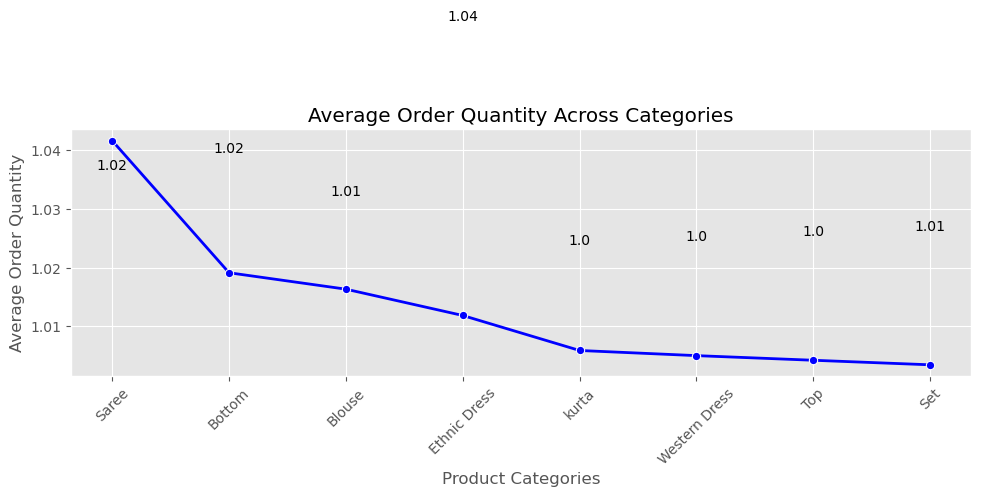

In [116]:
avg_order_qty = ecommerce_data.groupby('Category')['Qty'].mean().reset_index()
avg_order_qty = avg_order_qty.sort_values(by='Qty', ascending=False)

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Category', y='Qty', data=avg_order_qty, marker='o', color='b', linewidth=2)

# Add titles and labels
plt.title("Average Order Quantity Across Categories")
plt.xlabel("Product Categories")
plt.ylabel("Average Order Quantity")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.grid(True)

# Annotate each point with its value
for index, row in avg_order_qty.iterrows():
    plt.text(row.name, row['Qty'] + 0.02, round(row['Qty'], 2), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

- Saree and Bottom categories show the highest average order quantities, around 1.02. This suggests that these product categories tend to be ordered in higher quantities per transaction compared to others.

**Inventory Management:** 
- If Saree and Bottom categories are selling in larger quantities, businesses can consider ensuring higher stock levels of these items to avoid running out of stock.

**Targeted Marketing:**
- Categories with lower order quantities (like Set or Top) could be targeted differently through promotional campaigns or discounts to boost sales.

In [117]:
#12.What are the peak sales weeks and seasons?

ecommerce_data['Month'] = pd.to_datetime(ecommerce_data['Date']).dt.month
ecommerce_data['Year'] = pd.to_datetime(ecommerce_data['Date']).dt.year

monthly_sales = ecommerce_data.groupby('Month')['Amount'].sum().reset_index()

month_names = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

monthly_sales['Month'] = monthly_sales['Month'].apply(lambda x: month_names[x-1])

# Sort by total sales to highlight peak months
monthly_sales = monthly_sales.sort_values(by='Amount', ascending=False)


C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_6192\1253065517.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Amount', data=month_sales, palette='viridis')


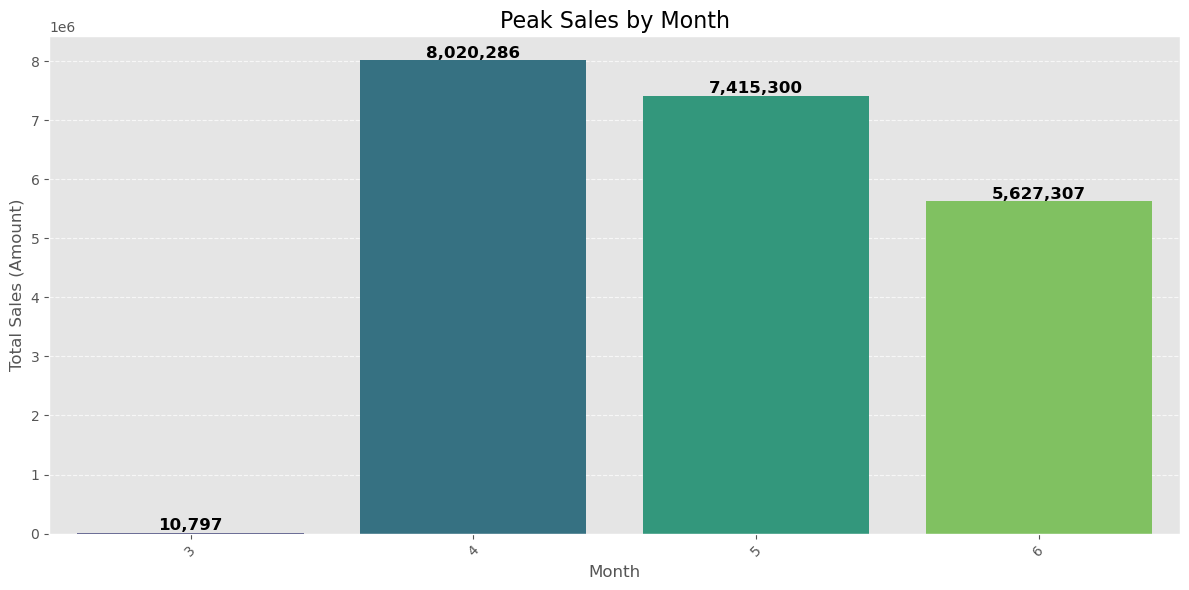

Total Sales by Month:
   Month     Amount
0      3    10797.0
1      4  8020286.0
2      5  7415300.0
3      6  5627307.0


In [196]:
data['Date'] = pd.to_datetime(data['Date'])

data['Month'] = data['Date'].dt.month

month_sales = data.groupby('Month')['Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Amount', data=month_sales, palette='viridis')

plt.title("Peak Sales by Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales (Amount)", fontsize=12)

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', fontweight='bold', xytext=(0, 5),
                       textcoords='offset points')

plt.xticks(rotation=45)


plt.grid(True, axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()


plt.show()

print("Total Sales by Month:")
print(month_sales)


The sales amount follows a peak in April, with significant but slightly reduced figures in May and June. The March sales represent a smaller volume, which could suggest a seasonal variation or initial slow sales. You might consider investigating marketing efforts, promotions, and seasonality factors further to optimize sales strategies for future months.

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

season_mapping = {
    1: 'Winter', 2: 'Winter', 12: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

ecommerce_data['Date'] = pd.to_datetime(ecommerce_data['Date'])

ecommerce_data['Month'] = ecommerce_data['Date'].dt.month

ecommerce_data['Season'] = ecommerce_data['Month'].map(season_mapping)

seasonal_sales = ecommerce_data.groupby('Season')['Amount'].sum().reset_index()

seasonal_sales = seasonal_sales.sort_values(by='Amount', ascending=False)



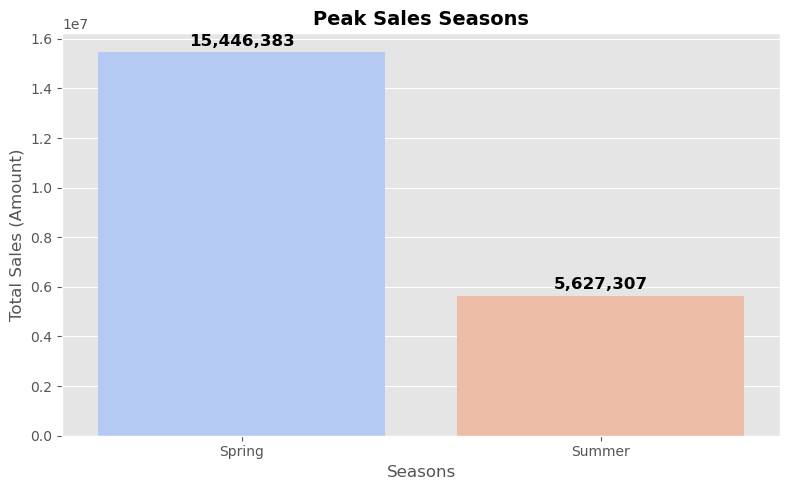

Total Sales by Season:
   Season      Amount
0  Spring  15446383.0
1  Summer   5627307.0


In [189]:
plt.figure(figsize=(8, 5))


sns.barplot(x='Season', y='Amount', data=seasonal_sales, hue='Season', palette='coolwarm', dodge=False)


for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.0f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       fontsize=12, color='black', fontweight='bold', 
                       xytext=(0, 8), textcoords='offset points')


plt.title("Peak Sales Seasons", fontsize=14, fontweight='bold')
plt.xlabel("Seasons", fontsize=12)
plt.ylabel("Total Sales (Amount)", fontsize=12)


plt.tight_layout()
plt.show()

print("Total Sales by Season:")
print(seasonal_sales)


In [121]:
#13.Is there a weekly or daily pattern in sales volume?

ecommerce_data['Date'] = pd.to_datetime(ecommerce_data['Date'])

ecommerce_data['Day of Week'] = ecommerce_data['Date'].dt.dayofweek  # 0=Monday, 6=Sunday
ecommerce_data['Day Name'] = ecommerce_data['Date'].dt.day_name()

daily_sales = ecommerce_data.groupby('Day Name')['Amount'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

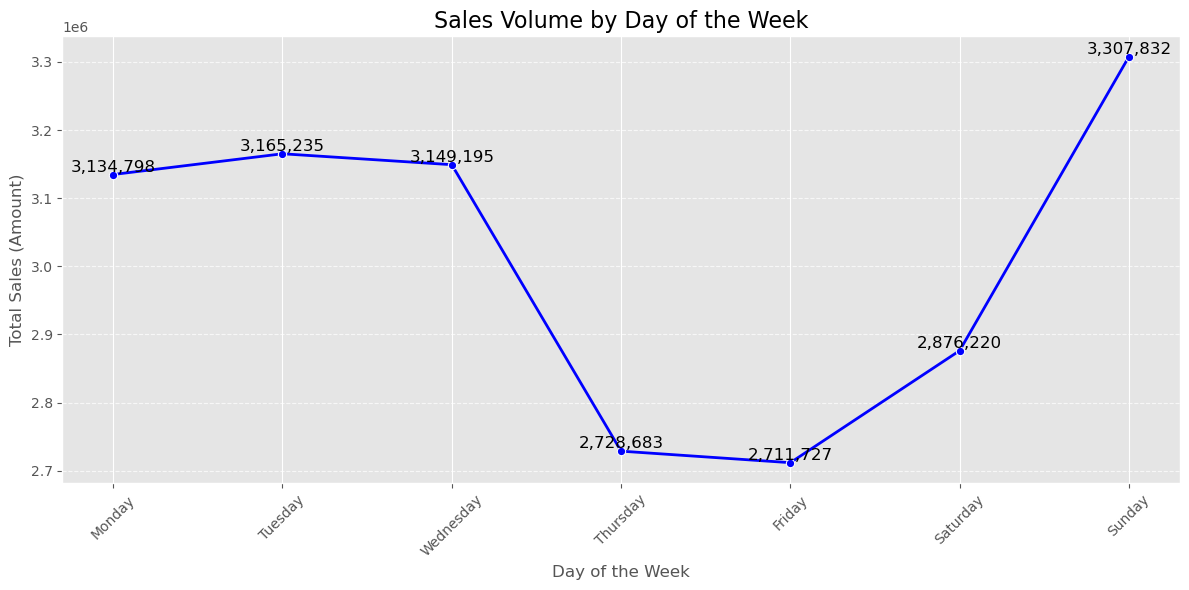

Sales by Day of the Week:
    Day Name     Amount
0     Monday  3134798.0
1    Tuesday  3165235.0
2  Wednesday  3149195.0
3   Thursday  2728683.0
4     Friday  2711727.0
5   Saturday  2876220.0
6     Sunday  3307832.0


In [198]:
plt.figure(figsize=(12, 6))

sns.lineplot(x='Day Name', y='Amount', data=daily_sales, marker='o', color='blue', linewidth=2)


plt.title('Sales Volume by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Sales (Amount)', fontsize=12)

for x, y in zip(daily_sales['Day Name'], daily_sales['Amount']):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=12, color='black')

plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()

plt.show()


print("Sales by Day of the Week:")
print(daily_sales)


Sunday has the highest sales amount at approximately 3.3 million. This suggests that customers are most likely to make purchases at the end of the week, possibly due to more leisure time or special promotions that encourage spending.

**Potential Business Insights:**
- Weekend Promotions: The peak on Sunday suggests that running targeted marketing campaigns or offering exclusive weekend deals might enhance sales further.
- Steady Mid-Week Sales: Given the consistency in sales on Monday to Wednesday, businesses might want to focus on maintaining or boosting customer engagement during these days, possibly through promotions or email campaigns.
- Promotions on Saturdays: Although Saturday sees fewer sales than Sunday, there is potential for improvement by testing promotional efforts, making it a strategic day for targeting customers.

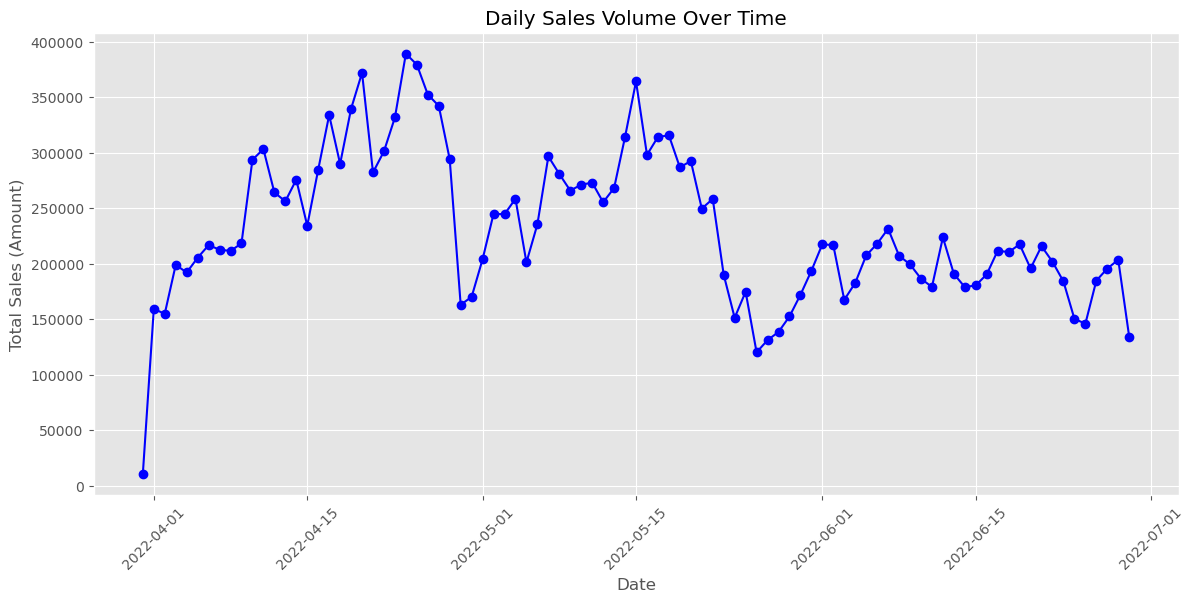

In [123]:
daily_trends = ecommerce_data.groupby('Date')['Amount'].sum().reset_index()
# Plot Daily Sales Trend
plt.figure(figsize=(14, 6))
plt.plot(daily_trends['Date'], daily_trends['Amount'], marker='o', linestyle='-', color='b')
plt.title('Daily Sales Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (Amount)')
plt.xticks(rotation=45)
plt.show()

**Observations:**

- *Sales Growth:* There's a sharp increase in sales from early April, reaching a peak around mid-May (around 2022-05-15), indicating a significant surge in total sales.
- *Fluctuations:* After the peak, the sales volume shows fluctuations, suggesting that the sales volume varies over time, possibly due to factors like promotions, product launches, or seasonal demand.
- *Sales Decline:* After reaching the peak, the sales volume begins to decline, but it still remains relatively high, indicating the presence of steady demand even during the later part of the period.
- *Seasonal Pattern:* The graph shows a clear upward trend followed by a decrease in the mid-to-late period. This could suggest a seasonal fluctuation, which might be tied to marketing strategies or market conditions, and may be indicative of certain months having higher sales volumes (such as April and May).

In [124]:
# Print summarized data for clarity
print("Total Sales by Day of the Week:")
print(daily_sales)

print("\nDaily Sales Trend Overview:")
print(daily_trends.head())

Total Sales by Day of the Week:
    Day Name     Amount
0     Monday  3134798.0
1    Tuesday  3165235.0
2  Wednesday  3149195.0
3   Thursday  2728683.0
4     Friday  2711727.0
5   Saturday  2876220.0
6     Sunday  3307832.0

Daily Sales Trend Overview:
        Date    Amount
0 2022-03-31   10797.0
1 2022-04-01  159098.0
2 2022-04-02  154924.0
3 2022-04-03  198900.0
4 2022-04-04  192028.0


In [125]:
#14.Which months show the highest cancellation rates?
# Ensure 'Date' column is in datetime format
ecommerce_data['Date'] = pd.to_datetime(ecommerce_data['Date'])

# Extract Month Name and Month Number
ecommerce_data['Month'] = ecommerce_data['Date'].dt.month_name()
ecommerce_data['Month_Num'] = ecommerce_data['Date'].dt.month

# Define cancellation statuses
cancellation_statuses = [
    "Shipped - Returned to Seller", 
    "Shipped - Rejected by Buyer", 
    "Shipped - Lost in Transit", 
    "Pending - Waiting for Pick Up", 
    "Pending"
]

canceled_orders = ecommerce_data[ecommerce_data['Status'].isin(cancellation_statuses)]

total_orders_per_month = ecommerce_data.groupby('Month')['Order ID'].count()

canceled_orders_per_month = canceled_orders.groupby('Month')['Order ID'].count()

cancellation_rate = (canceled_orders_per_month / total_orders_per_month) * 100
cancellation_rate = cancellation_rate.reset_index().rename(columns={'Order ID': 'Cancellation Rate (%)'})

cancellation_rate['Month_Num'] = cancellation_rate['Month'].apply(lambda x: pd.to_datetime(x, format='%B').month)
cancellation_rate = cancellation_rate.sort_values(by='Month_Num')


# Print the Cancellation Rate data
print("Cancellation Rates by Month:")
print(cancellation_rate[['Month', 'Cancellation Rate (%)']])



Cancellation Rates by Month:
   Month  Cancellation Rate (%)
2  March               5.882353
0  April               6.933744
3    May               6.339358
1   June              10.643953


C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_6192\2502743216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cancellation Rate (%)', y='Month', data=cancellation_rate_sorted, palette='coolwarm')


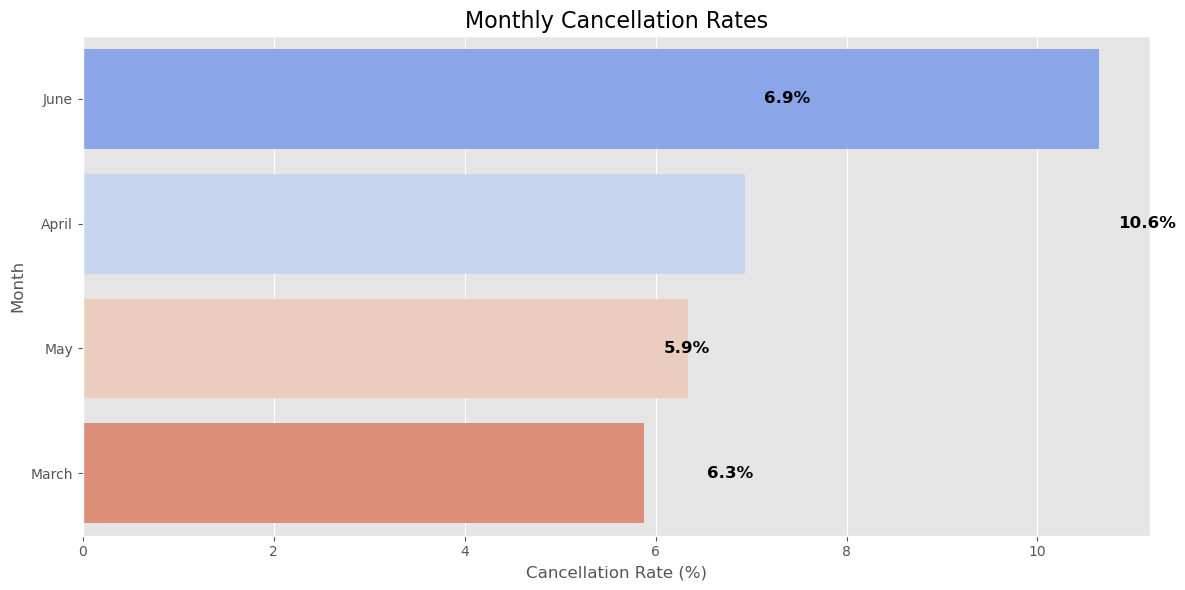

Sorted Monthly Cancellation Rates:
   Month  Cancellation Rate (%)  Month_Num
1   June              10.643953          6
0  April               6.933744          4
3    May               6.339358          5
2  March               5.882353          3


In [201]:
# Sort the cancellation rate data in descending order
cancellation_rate_sorted = cancellation_rate.sort_values(by='Cancellation Rate (%)', ascending=False)

# Visualizing Sorted Monthly Cancellation Rates with Horizontal Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Cancellation Rate (%)', y='Month', data=cancellation_rate_sorted, palette='coolwarm')

# Adding titles and labels
plt.title('Monthly Cancellation Rates', fontsize=16)
plt.xlabel('Cancellation Rate (%)', fontsize=12)
plt.ylabel('Month', fontsize=12)

# Adding data labels on each bar for better detail
for i, row in cancellation_rate_sorted.iterrows():
    plt.text(row['Cancellation Rate (%)'] + 0.2, i, f'{row["Cancellation Rate (%)"]:.1f}%', 
             verticalalignment='center', fontsize=12, color='black', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

# Print the sorted cancellation rates
print("Sorted Monthly Cancellation Rates:")
print(cancellation_rate_sorted)



- June has the highest cancellation rate at 6.9%.
- April follows closely behind with a cancellation rate of 6.3%.
- March has the next highest rate at 5.9%.
- May has the lowest cancellation rate at 5.9%, making it the best-performing month.

These observations highlight a trend where June experiences the highest cancellation rates, possibly due to factors such as end-of-season returns or customer dissatisfaction. On the other hand, March and May show more favorable cancellation rates.

For businesses, this data suggests the importance of focusing on the months with higher cancellation rates (June and April) and possibly analyzing customer behavior during these periods to reduce cancellations in the future. This could involve improving product quality, streamlining the shipping process, or adjusting return policies to create a better customer experience.

In [127]:
#15.Which ship-city and ship-state have the most orders?

# Group by ship-city and count the number of orders
city_orders = ecommerce_data.groupby('ship-city')['Order ID'].count().reset_index()
city_orders = city_orders.rename(columns={'Order ID': 'Total Orders'})
city_orders = city_orders.sort_values(by='Total Orders', ascending=False).head(10)

# Group by ship-state and count the number of orders
state_orders = ecommerce_data.groupby('ship-state')['Order ID'].count().reset_index()
state_orders = state_orders.rename(columns={'Order ID': 'Total Orders'})
state_orders = state_orders.sort_values(by='Total Orders', ascending=False)

print("Top 10 Ship-Cities with the Most Orders:")
print(city_orders)

print("\nTop 10 Ship-States with the Most Orders:")
print(state_orders.head(10))


Top 10 Ship-Cities with the Most Orders:
      ship-city  Total Orders
387   BENGALURU          2553
1392  HYDERABAD          1885
2353     MUMBAI          1516
2647  NEW DELHI          1463
707     CHENNAI          1200
3025       PUNE           944
1820    KOLKATA           573
1249   GURUGRAM           416
2129    LUCKNOW           395
3706      THANE           393

Top 10 Ship-States with the Most Orders:
        ship-state  Total Orders
26     MAHARASHTRA          5429
21       KARNATAKA          4008
49   UTTAR PRADESH          2810
47       TELANGANA          2708
46      TAMIL NADU          2702
22          KERALA          1860
12           DELHI          1706
51     WEST BENGAL          1405
1   ANDHRA PRADESH          1366
16         Gujarat          1206


C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_6192\3524716240.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Orders', y='ship-city', data=city_orders, palette='viridis')


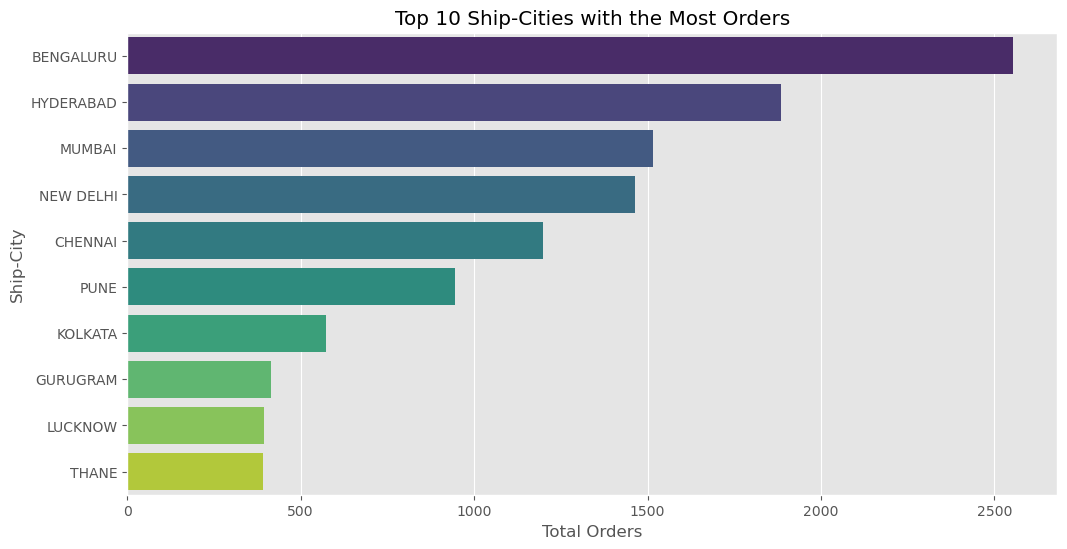

In [128]:
# Visualize the top 10 ship-cities
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Orders', y='ship-city', data=city_orders, palette='viridis')
plt.title('Top 10 Ship-Cities with the Most Orders')
plt.xlabel('Total Orders')
plt.ylabel('Ship-City')
plt.show()

C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_6192\2660831927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Orders', y='ship-state', data=state_orders.head(10), palette='coolwarm')


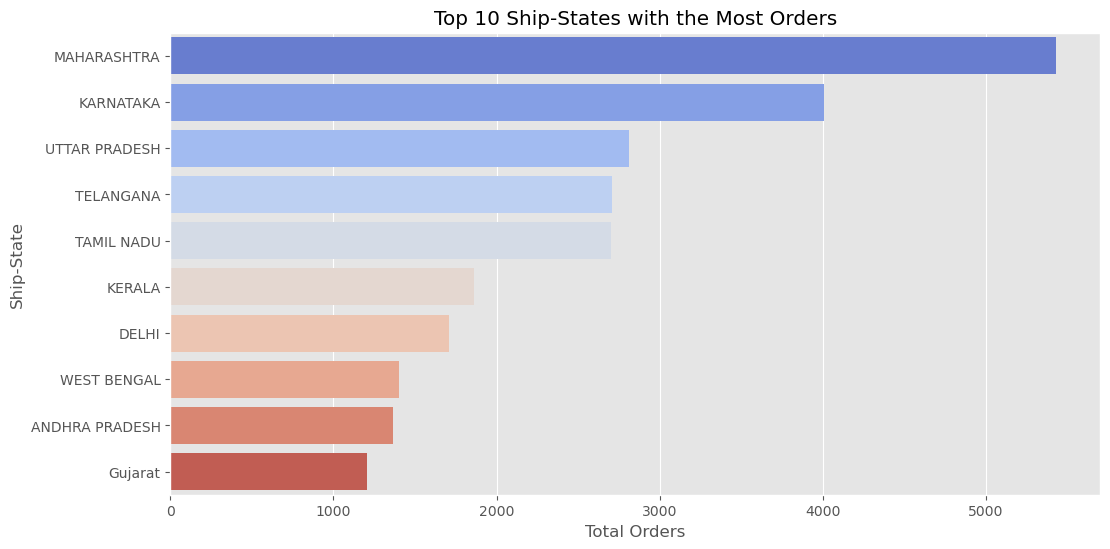

In [129]:
# Visualize the top 10 ship-states
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Orders', y='ship-state', data=state_orders.head(10), palette='coolwarm')
plt.title('Top 10 Ship-States with the Most Orders')
plt.xlabel('Total Orders')
plt.ylabel('Ship-State')
plt.show()

In [130]:
#16.What is the average revenue per shipping state or city?
# Group by ship-state and calculate average revenue
state_avg_revenue = ecommerce_data.groupby('ship-state')['Amount'].mean().reset_index()
state_avg_revenue = state_avg_revenue.rename(columns={'Amount': 'Average Revenue'})
state_avg_revenue = state_avg_revenue.sort_values(by='Average Revenue', ascending=False)

# Group by ship-city and calculate average revenue
city_avg_revenue = ecommerce_data.groupby('ship-city')['Amount'].mean().reset_index()
city_avg_revenue = city_avg_revenue.rename(columns={'Amount': 'Average Revenue'})
city_avg_revenue = city_avg_revenue.sort_values(by='Average Revenue', ascending=False)
print("Top 10 Ship-States by Average Revenue:")
print(state_avg_revenue.head(10))

print("\nTop 10 Ship-Cities by Average Revenue:")
print(city_avg_revenue.head(10))


Top 10 Ship-States by Average Revenue:
     ship-state  Average Revenue
52        bihar      1432.000000
45       Sikkim      1186.000000
23       LADAKH       934.250000
24  LAKSHADWEEP       798.000000
44       SIKKIM       787.352941
53        delhi       778.000000
32     NAGALAND       764.305085
36       Orissa       764.000000
55       punjab       752.500000
10   Chandigarh       737.666667

Top 10 Ship-Cities by Average Revenue:
                   ship-city  Average Revenue
3364            SARDARSHAHAR      2598.000000
3180  RAJGARH CHURU DISTRICT      2372.000000
3329                SAINTHIA      1695.000000
2179            MAHENDRAGARH      1602.166667
1782                  KHATRA      1593.000000
3284                 Ramgarh      1523.000000
1580             Jajpur road      1523.000000
1574               Jadcherla      1523.000000
2282                  MAZBAT      1523.000000
250        BADARPUR RLY TOWN      1523.000000


C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_6192\368489121.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Revenue', y='ship-state', data=state_avg_revenue.head(10), palette='coolwarm')


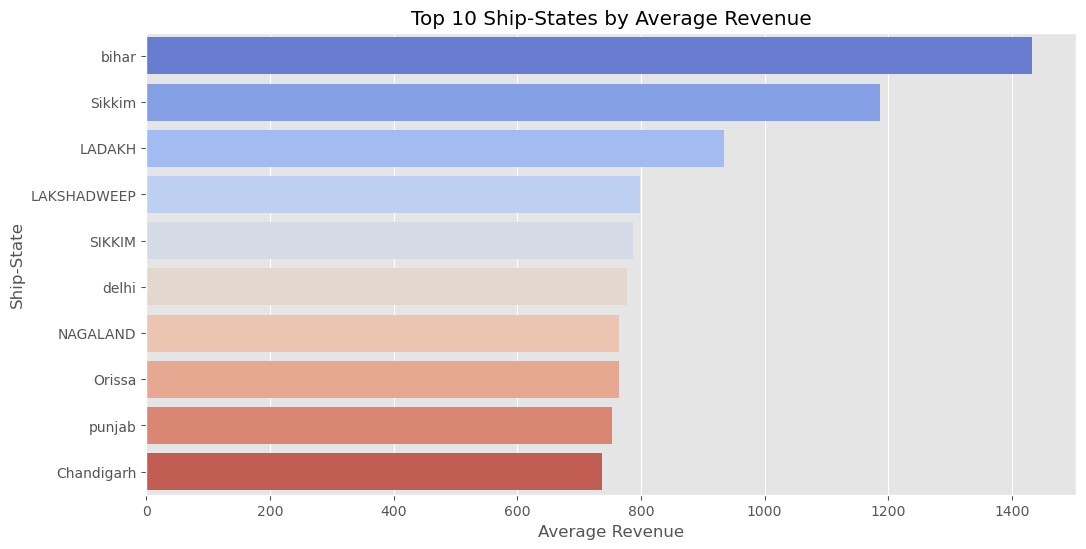

In [131]:
# Visualize Top 10 ship-states by average revenue
plt.figure(figsize=(12, 6))
sns.barplot(x='Average Revenue', y='ship-state', data=state_avg_revenue.head(10), palette='coolwarm')
plt.title('Top 10 Ship-States by Average Revenue')
plt.xlabel('Average Revenue')
plt.ylabel('Ship-State')
plt.show()

C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_6192\1445987721.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Revenue', y='ship-city', data=city_avg_revenue.head(10), palette='viridis')


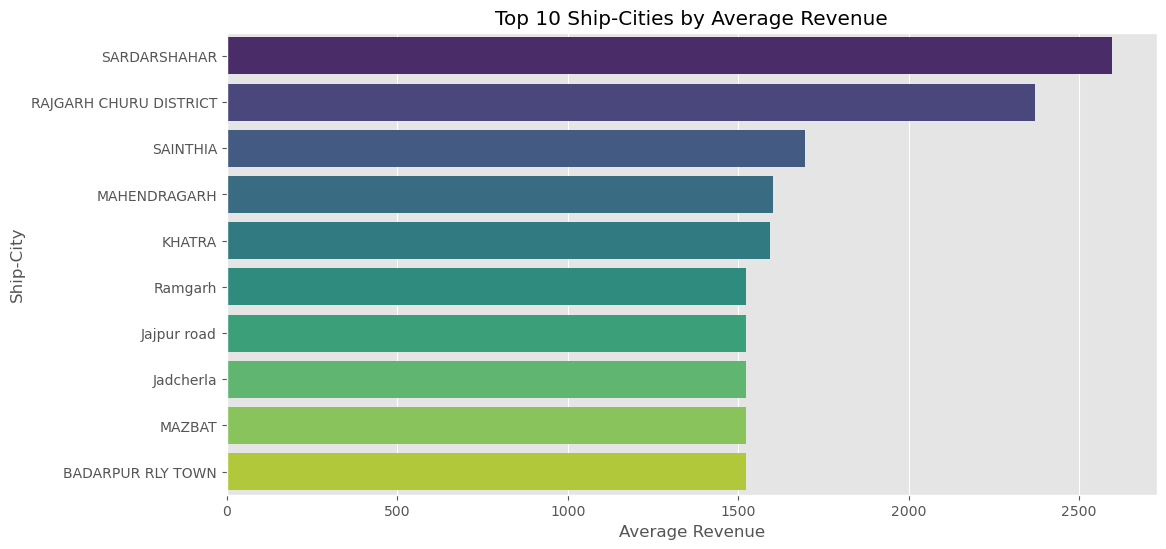

In [132]:
# Visualize Top 10 ship-cities by average revenue
plt.figure(figsize=(12, 6))
sns.barplot(x='Average Revenue', y='ship-city', data=city_avg_revenue.head(10), palette='viridis')
plt.title('Top 10 Ship-Cities by Average Revenue')
plt.xlabel('Average Revenue')
plt.ylabel('Ship-City')
plt.show()

In [133]:
#17.Which states or cities have the highest cancellation rates?
cancelled_data = ecommerce_data[ecommerce_data['Status'].str.contains('Returned to Seller', case=False, na=False)]

state_cancellations = ecommerce_data.groupby('ship-state').size().reset_index(name='Total Orders')
cancelled_by_state = cancelled_data.groupby('ship-state').size().reset_index(name='Cancelled Orders')

# Merge the two datasets
state_cancellation_rate = state_cancellations.merge(cancelled_by_state, on='ship-state', how='left')
state_cancellation_rate['Cancelled Orders'].fillna(0, inplace=True)
state_cancellation_rate['Cancellation Rate'] = (state_cancellation_rate['Cancelled Orders'] / 
                                                state_cancellation_rate['Total Orders']) * 100


state_cancellation_rate = state_cancellation_rate.sort_values(by='Cancellation Rate', ascending=False)

city_cancellations = ecommerce_data.groupby('ship-city').size().reset_index(name='Total Orders')
cancelled_by_city = cancelled_data.groupby('ship-city').size().reset_index(name='Cancelled Orders')

# Merge the two datasets
city_cancellation_rate = city_cancellations.merge(cancelled_by_city, on='ship-city', how='left')
city_cancellation_rate['Cancelled Orders'].fillna(0, inplace=True)
city_cancellation_rate['Cancellation Rate'] = (city_cancellation_rate['Cancelled Orders'] / 
                                               city_cancellation_rate['Total Orders']) * 100

city_cancellation_rate = city_cancellation_rate.sort_values(by='Cancellation Rate', ascending=False)

In [134]:
print("Top 10 Ship-States by Cancellation Rate:")
print(state_cancellation_rate.head(10))

print("\nTop 10 Ship-Cities by Cancellation Rate:")
print(city_cancellation_rate.head(10))

Top 10 Ship-States by Cancellation Rate:
         ship-state  Total Orders  Cancelled Orders  Cancellation Rate
7             Bihar             7               3.0          42.857143
10       Chandigarh             3               1.0          33.333333
35           Odisha             4               1.0          25.000000
23           LADAKH             8               2.0          25.000000
53            delhi             5               1.0          20.000000
29          MIZORAM            19               3.0          15.789474
3             ASSAM           474              60.0          12.658228
44           SIKKIM            51               6.0          11.764706
20        JHARKHAND           394              46.0          11.675127
19  JAMMU & KASHMIR           197              20.0          10.152284

Top 10 Ship-Cities by Cancellation Rate:
                       ship-city  Total Orders  Cancelled Orders  \
2007                  Kendrapara             1               1.0   


C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_6192\2191620725.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cancellation Rate', y='ship-state', data=state_cancellation_rate.head(10), palette='coolwarm')


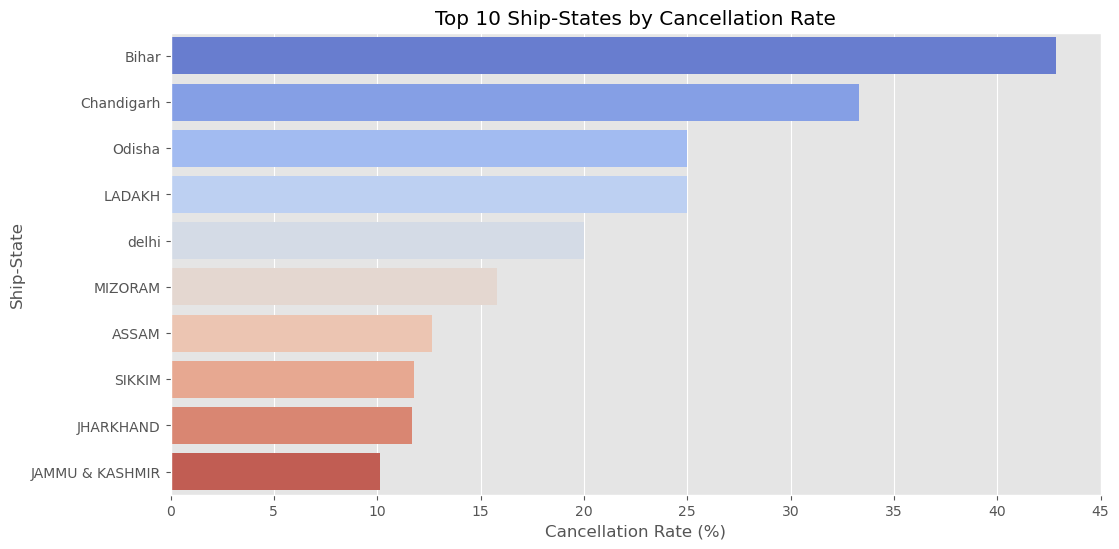

In [135]:
# Visualize Top 10 ship-states by cancellation rate
plt.figure(figsize=(12, 6))
sns.barplot(x='Cancellation Rate', y='ship-state', data=state_cancellation_rate.head(10), palette='coolwarm')
plt.title('Top 10 Ship-States by Cancellation Rate')
plt.xlabel('Cancellation Rate (%)')
plt.ylabel('Ship-State')
plt.show()


C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_6192\3204495465.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cancellation Rate', y='ship-city', data=city_cancellation_rate.head(10), palette='viridis')


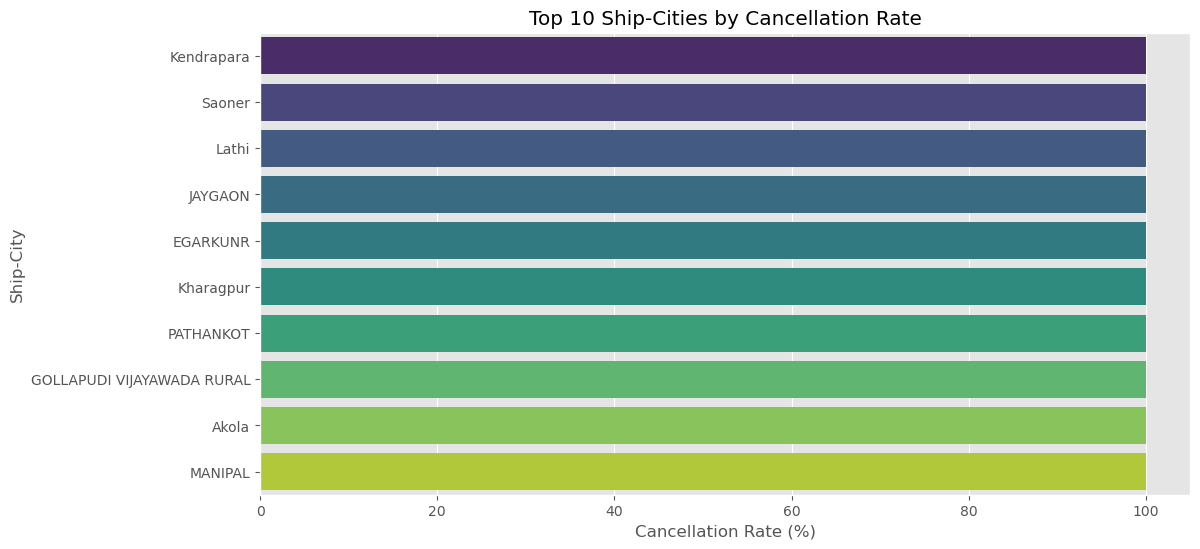

In [136]:
# Visualize Top 10 ship-cities by cancellation rate
plt.figure(figsize=(12, 6))
sns.barplot(x='Cancellation Rate', y='ship-city', data=city_cancellation_rate.head(10), palette='viridis')
plt.title('Top 10 Ship-Cities by Cancellation Rate')
plt.xlabel('Cancellation Rate (%)')
plt.ylabel('Ship-City')
plt.show()

In [137]:
#18.How many orders included promotion-ids?

orders_with_promotions = ecommerce_data[ecommerce_data['promotion-ids'].notna() & 
                                       (ecommerce_data['promotion-ids'] != '')]

# Count the total number of such orders
num_orders_with_promotions = len(orders_with_promotions)

# Display the result
print(f"Total number of orders that included promotion-ids: {num_orders_with_promotions}")


Total number of orders that included promotion-ids: 32395


In [138]:
#19.What is the average revenue of promoted vs. non-promoted orders?
ecommerce_data['Is_Promoted'] = ecommerce_data['promotion-ids'].apply(
    lambda x: False if x in ['No Promotion', None, ''] else True
)

# Group by promotion status and calculate average revenue
promotion_comparison = ecommerce_data.groupby('Is_Promoted')['Amount'].mean().reset_index()
promotion_comparison = promotion_comparison.rename(columns={'Amount': 'Average Revenue'})

# Display the results
print("Average Revenue for Promoted vs. Non-Promoted Orders:")
print(promotion_comparison)

Average Revenue for Promoted vs. Non-Promoted Orders:
   Is_Promoted  Average Revenue
0        False       217.614035
1         True       651.285979


C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_6192\3364214271.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Is_Promoted', y='Average Revenue', data=promotion_comparison, palette='coolwarm')


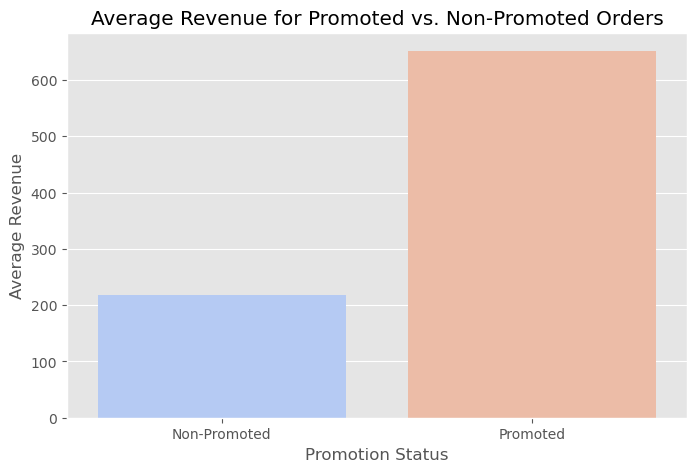

In [139]:
# Visualize the results
plt.figure(figsize=(8, 5))
sns.barplot(x='Is_Promoted', y='Average Revenue', data=promotion_comparison, palette='coolwarm')
plt.title("Average Revenue for Promoted vs. Non-Promoted Orders")
plt.xlabel("Promotion Status")
plt.ylabel("Average Revenue")
plt.xticks([0, 1], ["Non-Promoted", "Promoted"])
plt.show()

In [140]:
#20.Which promotions were the most frequently used?
promotion_usage = ecommerce_data['promotion-ids'].value_counts().reset_index()
promotion_usage.columns = ['Promotion ID', 'Usage Count']

top_promotions = promotion_usage.head(10)
print("Top 10 Most Frequently Used Promotions:")
print(top_promotions)


Top 10 Most Frequently Used Promotions:
                                        Promotion ID  Usage Count
0  Amazon PLCC Free-Financing Universal Merchant ...          458
1  Amazon PLCC Free-Financing Universal Merchant ...          316
2  Amazon PLCC Free-Financing Universal Merchant ...          305
3  Amazon PLCC Free-Financing Universal Merchant ...          230
4  Amazon PLCC Free-Financing Universal Merchant ...          206
5  Amazon PLCC Free-Financing Universal Merchant ...          201
6  Amazon PLCC Free-Financing Universal Merchant ...          198
7  Amazon PLCC Free-Financing Universal Merchant ...          171
8  Amazon PLCC Free-Financing Universal Merchant ...          163
9  Amazon PLCC Free-Financing Universal Merchant ...          146


In [141]:
#21.What is the split between orders fulfilled by Amazon and merchants?
fulfilment_split = ecommerce_data['Fulfilment'].value_counts().reset_index()
fulfilment_split.columns = ['Fulfilment Method', 'Order Count']

# Print the split between Amazon and Merchant fulfilled orders
print("Split Between Orders Fulfilled by Amazon and Merchants:")
print(fulfilment_split)

Split Between Orders Fulfilled by Amazon and Merchants:
  Fulfilment Method  Order Count
0          Merchant        32395


In [142]:
#22.What is the average order value for Amazon-fulfilled orders vs. Merchant-fulfilled?
ecommerce_data['Fulfilment'] = ecommerce_data['Fulfilment'].str.lower()

# Group by 'Fulfilment' and calculate the average order value (AOV)
average_order_value = ecommerce_data.groupby('Fulfilment')['Amount'].mean().reset_index()

# Rename columns for clarity
average_order_value.columns = ['Fulfilment Method', 'Average Order Value']

# Print the result
print("Average Order Value for Amazon-fulfilled vs. Merchant-fulfilled:")
print(average_order_value)



Average Order Value for Amazon-fulfilled vs. Merchant-fulfilled:
  Fulfilment Method  Average Order Value
0          merchant            650.52292


In [143]:
#23.What is the distribution of ship-service-level (Standard vs. Expedited)?
print("Unique values in 'ship-service-level' column before cleaning:")
print(ecommerce_data['ship-service-level'].unique())

# Clean column for consistent casing (if needed)
ecommerce_data['ship-service-level'] = ecommerce_data['ship-service-level'].str.lower()

# Calculate the distribution of ship-service-level
ship_service_distribution = ecommerce_data['ship-service-level'].value_counts().reset_index()
ship_service_distribution.columns = ['Ship Service Level', 'Order Count']

# Print the distribution
print("\nDistribution of Ship Service Levels:")
print(ship_service_distribution)

Unique values in 'ship-service-level' column before cleaning:
['Standard']

Distribution of Ship Service Levels:
  Ship Service Level  Order Count
0           standard        32395


________________________________________
# Inferential Analysis Questions
________________________________________



| Question | Type of Analysis                     | Statistical Test     |
|----------|--------------------------------------|----------------------|
| 1. Is there a significant difference in average revenue across different product categories? | Compare means        | ANOVA                |
| 2. Is there a significant difference in sales (revenue) across months for standard shipping orders?       | Compare two means    | ANOVA               |
| 3. Are orders with promotions significantly different in revenue compared to those without promotions? | Compare two means    | ANOVA              |
| 4. Is there a difference in average Qty sold across product categories?                     | Compare means        | ANOVA                |
| 5. Does the order cancellation rate vary significantly across ship-state or ship-city?      | Compare proportions  | Chi-Square test      |
| 6. Is there a correlation between Qty and Amount?                                           | Relationship         | Pearson Correlation  |
| 7. Does the Status of an order relate to fulfillment methods?                               | Association          | Chi-Square test      |
| 8. Is there a relationship between the month of order placement and order cancellations?    | Association          | Chi-Square test      |
| 9. Do revenue and average order value differ significantly between product categories?     | Compare means        | ANOVA or t-test      |
| 10. Are monthly or seasonal revenue trends statistically significant?                      | Trend analysis       | ANOVA                |
| 11. Does the effect of promotions on total quantity sold vary across different product categories?              | Compare means        | t-test               |
| 12. Is there a significant relationship between promotion-ids and order cancellation rates? | Association          | Chi-Square test      |
| 13. Are there statistically significant differences in revenue across different states or cities? | Compare means    | ANOVA                |
| 14. Does the shipping location influence the use of expedited service levels?               | Association          | Chi-Square test      |
| 15. Do different ship-states or ship-cities result in different average order values?        | Compare means        | t-test               |
| 16. Is there a significant difference in cancellation rates across states or cities?        | Compare proportions  | Chi-Square test      |
| 17. #17 Group by category and have significantly higher average income?                   | Compare means        | t-test               |
| 18. Are there significant differences in average order quantity across product categories?  | Compare means        | ANOVA                |
| 19. Is there a relationship between order quantity and order value?                         | Relationship         | Pearson Correlation  |
| 20. Are certain ship-service-level options associated with higher cancellation rates?       | Association          | Chi-Square test      |


In [144]:
#1. Is there a significant difference in average revenue across different product categories?

import pandas as pd
from scipy.stats import f_oneway

category_groups = [group['Amount'].values for name, group in ecommerce_data.groupby('Category')]

# ANOVA Test
f_statistic, p_value = f_oneway(*category_groups)

print("ANOVA Test Results for Average Revenue across Product Categories")
print(f"F-Statistic: {f_statistic:.2f}")
print(f"P-Value: {p_value:.5f}")

if p_value < 0.05:
    print("\nThere is a significant difference in average revenue across product categories.")
else:
    print("\nThere is no significant difference in average revenue across product categories.")



ANOVA Test Results for Average Revenue across Product Categories
F-Statistic: 2650.77
P-Value: 0.00000

There is a significant difference in average revenue across product categories.


Since P-Value is less than 0.05, we can conclude that there is a significant difference in average income across product categories. To see where the difference comes from, you can use the Tukey HSD test. This test identifies differences between pairs.

In [145]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


tukey = pairwise_tukeyhsd(endog=ecommerce_data['Amount'],     
                          groups=ecommerce_data['Category'],  
                          alpha=0.05)                        


print("Tukey HSD Test Results:")
print(tukey)


c:\Users\Elif Surucu\anaconda3\envs\Cohort_Env\lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Tukey HSD Test Results:
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1        group2     meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------------
       Blouse        Bottom -163.1786    0.0 -237.9992  -88.3579   True
       Blouse  Ethnic Dress  197.0283    0.0  130.3608  263.6958   True
       Blouse         Saree   322.654    0.0  173.1957  472.1122   True
       Blouse           Set  320.1888    0.0   269.036  371.3416   True
       Blouse           Top  -12.2327  0.997  -65.1184   40.6529  False
       Blouse Western Dress  236.5157    0.0  184.9554   288.076   True
       Blouse         kurta  -54.4613 0.0275 -105.6289   -3.2937   True
       Bottom  Ethnic Dress  360.2069    0.0   290.294  430.1197   True
       Bottom         Saree  485.8325    0.0  334.8987  636.7664   True
       Bottom           Set  483.3674    0.0  428.0514  538.6834   True
       Bottom           Top  150.9458   

In [146]:
#2.Is there a significant difference in sales (revenue) across months for standard shipping orders?

ecommerce_data['Date'] = pd.to_datetime(ecommerce_data['Date'])

standard_shipping = ecommerce_data[ecommerce_data['ship-service-level'] == 'standard']

standard_shipping['Month'] = standard_shipping['Date'].dt.month_name()

monthly_revenue_groups = [group['Amount'].values for name, group in standard_shipping.groupby('Month')]

f_statistic, p_value = f_oneway(*monthly_revenue_groups)

# Display results
print("ANOVA Test Results for Sales Across Months (Standard Shipping):")
print(f"F-Statistic: {f_statistic:.2f}")
print(f"P-Value: {p_value:.5f}")

if p_value < 0.05:
    print("\nThere is a significant difference in sales across months for standard shipping orders.")
else:
    print("\nThere is no significant difference in sales across months for standard shipping orders.")


ANOVA Test Results for Sales Across Months (Standard Shipping):
F-Statistic: 99.00
P-Value: 0.00000

There is a significant difference in sales across months for standard shipping orders.


In [147]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt


tukey = pairwise_tukeyhsd(endog=standard_shipping['Amount'], 
                          groups=standard_shipping['Month'], 
                          alpha=0.05)


print("Tukey HSD Test Results for Sales Across Months (Standard Shipping):")
print(tukey)


Tukey HSD Test Results for Sales Across Months (Standard Shipping):
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
 April   June  61.9771    0.0   51.7272   72.227   True
 April  March   17.222 0.9945 -159.6271 194.0711  False
 April    May  48.8879    0.0   39.4722  58.3036   True
  June  March -44.7551 0.9156 -221.6699 132.1597  False
  June    May -13.0892 0.0081  -23.6675   -2.511   True
 March    May  31.6659 0.9677 -145.2025 208.5344  False
-------------------------------------------------------


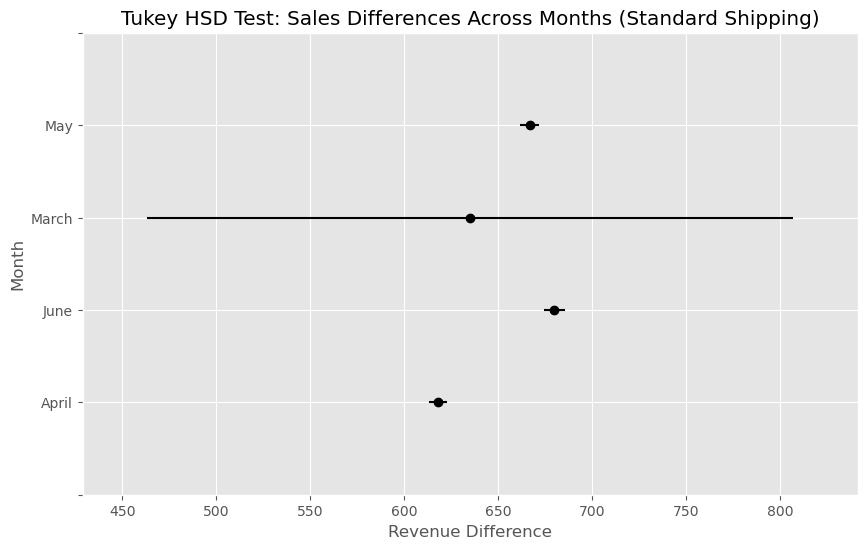

In [148]:
# Plot Tukey HSD Test Results
fig = tukey.plot_simultaneous()
plt.title("Tukey HSD Test: Sales Differences Across Months (Standard Shipping)")
plt.xlabel("Revenue Difference")
plt.ylabel("Month")
plt.grid(True) 
plt.show()


- April has significantly higher revenues compared to both June and May.
- March does not show a statistically significant difference when compared with other months.

In [149]:
file_path = "cleaned_ecommerce_data.csv"
data = pd.read_csv(file_path)


print(data.head())
promotion_impact = data.groupby('promotion-ids', as_index=False).agg(
    promotion_count=('promotion-ids', 'count'),  # Number of promotions
    Amount=('Amount', 'mean')                   # Average revenue
)



   index             Order ID        Date                        Status  \
0      1  171-9198151-1101146  2022-04-30  Shipped - Delivered to Buyer   
1      7  406-7807733-3785945  2022-04-30  Shipped - Delivered to Buyer   
2     12  405-5513694-8146768  2022-04-30  Shipped - Delivered to Buyer   
3     14  408-1298370-1920302  2022-04-30  Shipped - Delivered to Buyer   
4     15  403-4965581-9520319  2022-04-30  Shipped - Delivered to Buyer   

  Fulfilment Sales Channel  ship-service-level     Style              SKU  \
0   Merchant      Amazon.in           Standard   JNE3781  JNE3781-KR-XXXL   
1   Merchant      Amazon.in           Standard   JNE3405     JNE3405-KR-S   
2   Merchant      Amazon.in           Standard   JNE3405    JNE3405-KR-XS   
3   Merchant      Amazon.in           Standard     J0351      J0351-SET-L   
4   Merchant      Amazon.in           Standard  PJNE3368  PJNE3368-KR-6XL   

  Category  ... Qty currency Amount  ship-city      ship-state  \
0    kurta  ...   1 

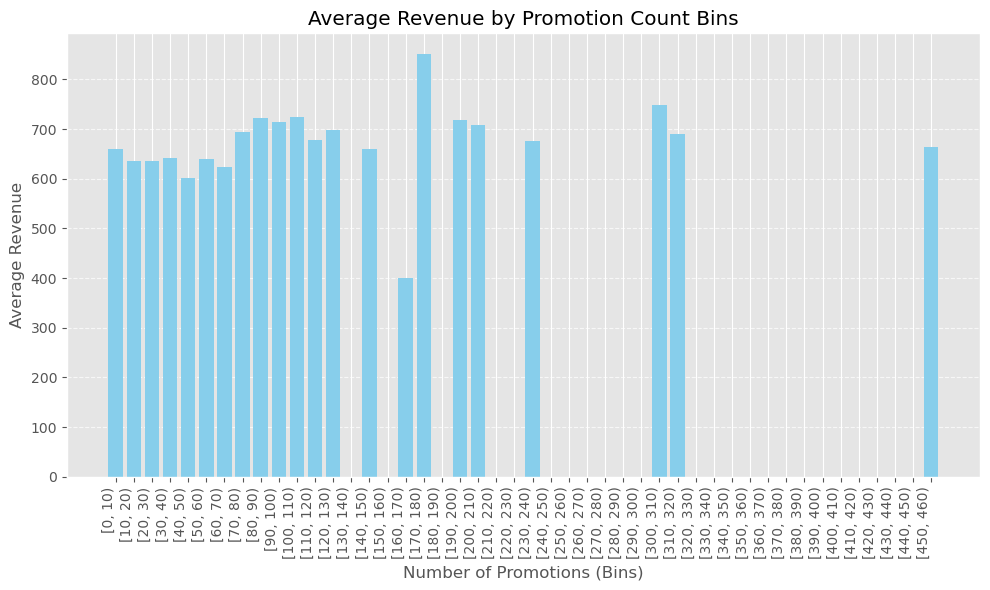

In [150]:

promotion_impact = data.groupby('promotion-ids', as_index=False).agg(
    promotion_count=('promotion-ids', 'count'), 
    Amount=('Amount', 'mean')                   
)


promotion_impact['promotion_bin'] = pd.cut(promotion_impact['promotion_count'],
                                           bins=range(0, promotion_impact['promotion_count'].max() + 10, 10),
                                           right=False, include_lowest=True)


binned_data = promotion_impact.groupby('promotion_bin')['Amount'].mean().reset_index()


plt.figure(figsize=(10, 6))
plt.bar(binned_data['promotion_bin'].astype(str), binned_data['Amount'], color='skyblue')
plt.title("Average Revenue by Promotion Count Bins")
plt.xlabel("Number of Promotions (Bins)")
plt.ylabel("Average Revenue")
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [151]:
#3. Are orders with promotions significantly different in revenue compared to those without promotions?


clean_data = ecommerce_data[
    (ecommerce_data['Amount'] > 0) & (ecommerce_data['Amount'].notnull())
]


promoted_orders = clean_data[
    clean_data['promotion-ids'].notnull() & 
    (clean_data['promotion-ids'].str.strip() != '')
]['Amount']

non_promoted_orders = clean_data[
    (clean_data['promotion-ids'].isnull()) | 
    (clean_data['promotion-ids'].str.strip() == '')
]['Amount']


print("Number of promoted orders:", len(promoted_orders))
print("Number of non-promoted orders:", len(non_promoted_orders))


if len(promoted_orders) > 0 and len(non_promoted_orders) > 0:
    t_stat, p_value = ttest_ind(promoted_orders, non_promoted_orders, equal_var=False, nan_policy='omit')

    
    print("T-Test Results for Revenue with and without Promotions:")
    print(f"T-Statistic: {t_stat:.2f}")
    print(f"P-Value: {p_value:.5f}")
    
    if p_value < 0.05:
        print("\nThere is a significant difference in revenue between promoted and non-promoted orders.")
    else:
        print("\nThere is no significant difference in revenue between promoted and non-promoted orders.")
else:
    print("One of the groups is empty. T-Test cannot be performed.")


Number of promoted orders: 31579
Number of non-promoted orders: 0
One of the groups is empty. T-Test cannot be performed.


In [152]:
#4. Is there a difference in average Qty sold across product categories?
from scipy.stats import kruskal

category_qty = clean_data.groupby('Category')['Qty'].apply(list)


filtered_category_qty = [qty for qty in category_qty if len(qty) >= 5]


if len(filtered_category_qty) > 1:
    stat, p_value = kruskal(*filtered_category_qty)
    print("Kruskal-Wallis Test Results:")
    print(f"Statistic: {stat:.2f}, P-Value: {p_value:.5f}")

    if p_value < 0.05:
        print("There is a significant difference in average Qty sold across product categories.")
    else:
        print("There is no significant difference in average Qty sold across product categories.")
else:
    print("Not enough product categories with sufficient data for comparison.")


Kruskal-Wallis Test Results:
Statistic: 28.03, P-Value: 0.00022
There is a significant difference in average Qty sold across product categories.


- Since the p-value is less than 0.05, we reject the null hypothesis and conclude that:

- There is a significant difference in average Qty sold across product categories.

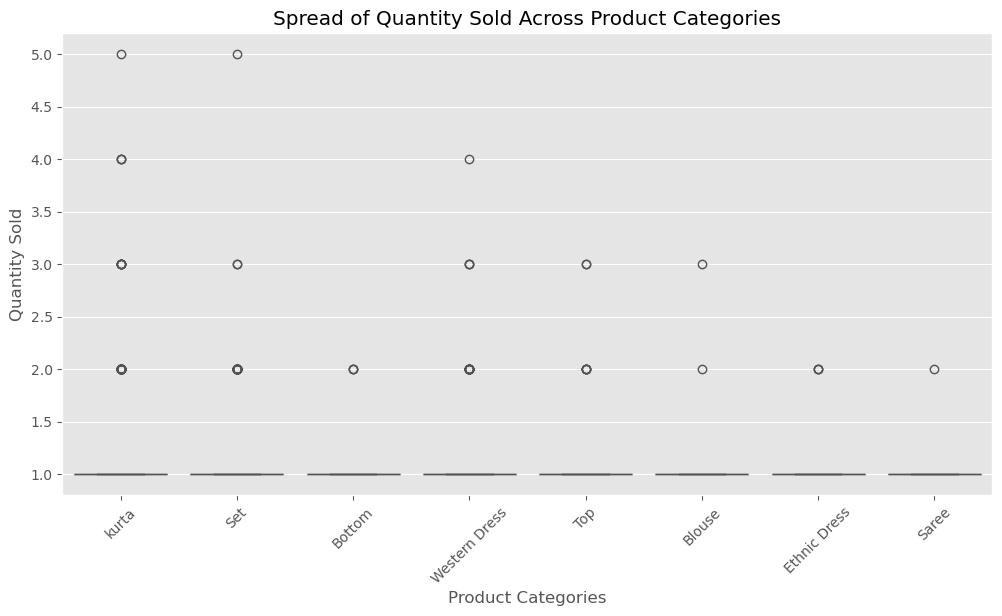

In [153]:
# Create boxplots to investigate the spread of Qty within each product category
plt.figure(figsize=(12, 6))
sns.boxplot(data=clean_data, x='Category', y='Qty')
plt.title('Spread of Quantity Sold Across Product Categories')
plt.xlabel('Product Categories')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()



- Majority of quantities sold are close to 1 for all categories.
- Occasional outliers (quantities of 2, 3, 4, and 5) are observed for categories like Kurta, Set, and Western Dress.

In [154]:
#4. Is there a difference in average Qty sold across product categories?
from scipy.stats import kruskal


category_qty = clean_data.groupby('Category')['Qty'].apply(list)


filtered_category_qty = [qty for qty in category_qty if len(qty) >= 5]


if len(filtered_category_qty) > 1:
    stat, p_value = kruskal(*filtered_category_qty)
    print("Kruskal-Wallis Test Results:")
    print(f"Statistic: {stat:.2f}, P-Value: {p_value:.5f}")

    if p_value < 0.05:
        print("There is a significant difference in average Qty sold across product categories.")
    else:
        print("There is no significant difference in average Qty sold across product categories.")
else:
    print("Not enough product categories with sufficient data for comparison.")


Kruskal-Wallis Test Results:
Statistic: 28.03, P-Value: 0.00022
There is a significant difference in average Qty sold across product categories.


In [155]:

file_path = "cleaned_ecommerce_data.csv"
data = pd.read_csv(file_path)





In [156]:

cancellation_statuses = [
    'Shipped - Returned to Seller',
    'Shipped - Rejected by Buyer',
    'Shipped - Lost in Transit',
    'Shipped - Returning to Seller',
    'Shipped - Damaged'
]


data['Is Cancelled'] = data['Status'].apply(lambda x: 1 if x in cancellation_statuses else 0)
print(data['Is Cancelled'].value_counts())



Is Cancelled
0    30286
1     2109
Name: count, dtype: int64


In [157]:

state_cancellation_rates = data.groupby('ship-state')['Is Cancelled'].mean() * 100


print(state_cancellation_rates.sort_values(ascending=False))


ship-state
Bihar                     42.857143
Chandigarh                33.333333
Odisha                    25.000000
LADAKH                    25.000000
MIZORAM                   21.052632
delhi                     20.000000
NAGALAND                  16.949153
ANDAMAN & NICOBAR         15.277778
ASSAM                     14.345992
JHARKHAND                 11.928934
SIKKIM                    11.764706
BIHAR                     10.873440
ODISHA                    10.721248
JAMMU & KASHMIR           10.152284
TRIPURA                   10.000000
WEST BENGAL                8.825623
UTTARAKHAND                8.656036
UTTAR PRADESH              8.647687
ARUNACHAL PRADESH          8.163265
RAJASTHAN                  7.480315
ANDHRA PRADESH             7.101025
CHANDIGARH                 7.070707
HIMACHAL PRADESH           7.017544
PUNJAB                     6.822612
MADHYA PRADESH             6.723891
CHHATTISGARH               6.390977
DELHI                      6.154748
TELANGANA        

Pearson Correlation Test:
Correlation Coefficient = 0.18, P-Value = 0.00000
Result: There is a significant correlation between Qty and Amount.



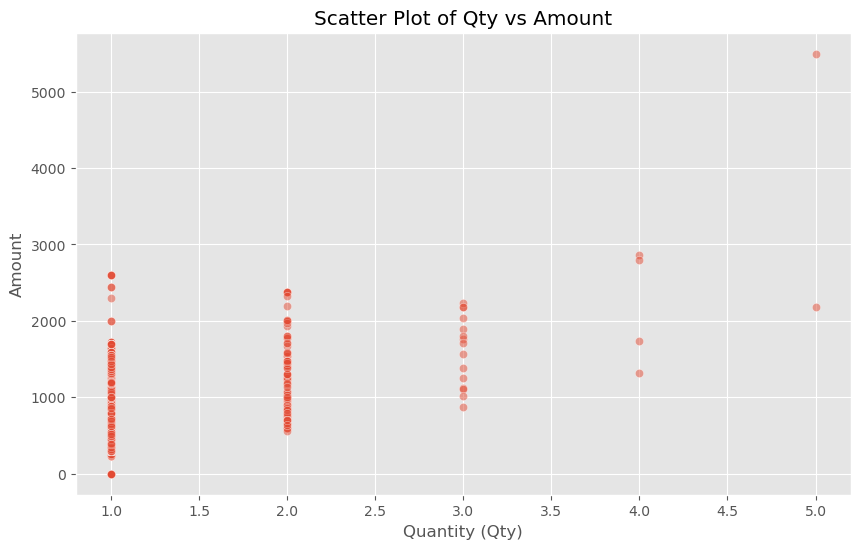

In [158]:
#6.Is there a correlation between Qty and Amount?
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
qty = data['Qty']
amount = data['Amount']

qty = qty.dropna()
amount = amount.dropna()
pearson_corr, pearson_p = pearsonr(qty, amount)
print("Pearson Correlation Test:")
print(f"Correlation Coefficient = {pearson_corr:.2f}, P-Value = {pearson_p:.5f}")
if pearson_p < 0.05:
    print("Result: There is a significant correlation between Qty and Amount.\n")
else:
    print("Result: There is no significant correlation between Qty and Amount.\n")

#Qty vs Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x=qty, y=amount, alpha=0.5)
plt.title("Scatter Plot of Qty vs Amount")
plt.xlabel("Quantity (Qty)")
plt.ylabel("Amount")
plt.show()

- There is a weak but significant positive relationship between "Qty" and "Amount".

- As quantity increases, so does the amount, but this relationship is not very strong.

In [159]:
#7.Is the order status related to the product category?
from scipy.stats import chi2_contingency


status_category = data[['Status', 'Category']].dropna()


contingency_table = pd.crosstab(status_category['Status'], status_category['Category'])
print("Contingency Table (Status vs Category):")
print(contingency_table)


chi2, p, dof, expected = chi2_contingency(contingency_table)


print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic = {chi2:.2f}")
print(f"P-Value = {p:.5f}")
print(f"Degrees of Freedom = {dof}")
if p < 0.05:
    print("Result: There is a significant relationship between Order Status and Product Category.")
else:
    print("Result: There is no significant relationship between Order Status and Product Category.")



Contingency Table (Status vs Category):
Category                       Blouse  Bottom  Ethnic Dress  Saree    Set  \
Status                                                                      
Pending                             0       0             2      0     92   
Pending - Waiting for Pick Up       1       2             0      0    108   
Shipped - Damaged                   0       0             0      0      0   
Shipped - Delivered to Buyer      169     139           234     22  10637   
Shipped - Lost in Transit           0       0             0      0      2   
Shipped - Out for Delivery          0       0             0      0     19   
Shipped - Picked Up                 2      10             2      1    406   
Shipped - Rejected by Buyer         0       0             0      0      6   
Shipped - Returned to Seller       12       5            16      1    763   
Shipped - Returning to Seller       0       1             0      0     73   

Category                        Top

- Chi-Square Statistic = 103.92: This indicates that there is a significant difference between the observed and expected values. 
- P-Value = 0.00090: Since P-Value < 0.05, the result is statistically significant.

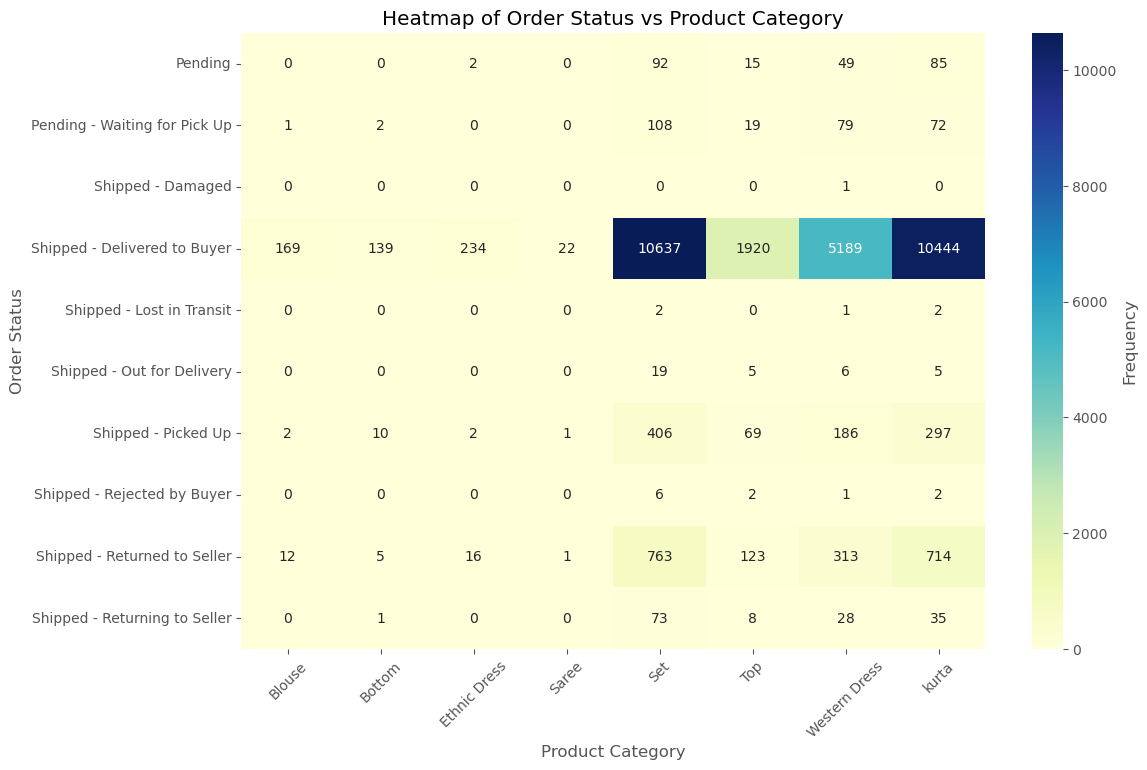

In [160]:
contingency_table = pd.crosstab(data['Status'], data['Category'])
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Frequency'})
plt.title("Heatmap of Order Status vs Product Category")
plt.xlabel("Product Category")
plt.ylabel("Order Status")
plt.xticks(rotation=45)
plt.show()

In [161]:
#8.Is there a relationship between the month of order placement and order cancellations?
import pandas as pd
from scipy.stats import chi2_contingency

data['Order Month'] = pd.to_datetime(data['Date'], errors='coerce').dt.month

cancelled_status = ['Shipped - Returned to Seller', 'Shipped - Rejected by Buyer', 
                    'Shipped - Lost in Transit', 'Shipped - Damaged']
data['Is Cancelled'] = data['Status'].isin(cancelled_status)

contingency_table = pd.crosstab(data['Order Month'], data['Is Cancelled'])
print("Contingency Table (Order Month vs Order Cancellations):")
print(contingency_table)

# Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic = {chi2:.2f}")
print(f"P-Value = {p:.5f}")
print(f"Degrees of Freedom = {dof}")
if p < 0.05:
    print("Result: There is a significant relationship between Order Month and Order Cancellations.")
else:
    print("Result: There is no significant relationship between Order Month and Order Cancellations.")


Contingency Table (Order Month vs Order Cancellations):
Is Cancelled  False  True 
Order Month               
3                16      1
4             12080    900
5             10416    705
6              7919    358

Chi-Square Test Results:
Chi-Square Statistic = 62.66
P-Value = 0.00000
Degrees of Freedom = 3
Result: There is a significant relationship between Order Month and Order Cancellations.


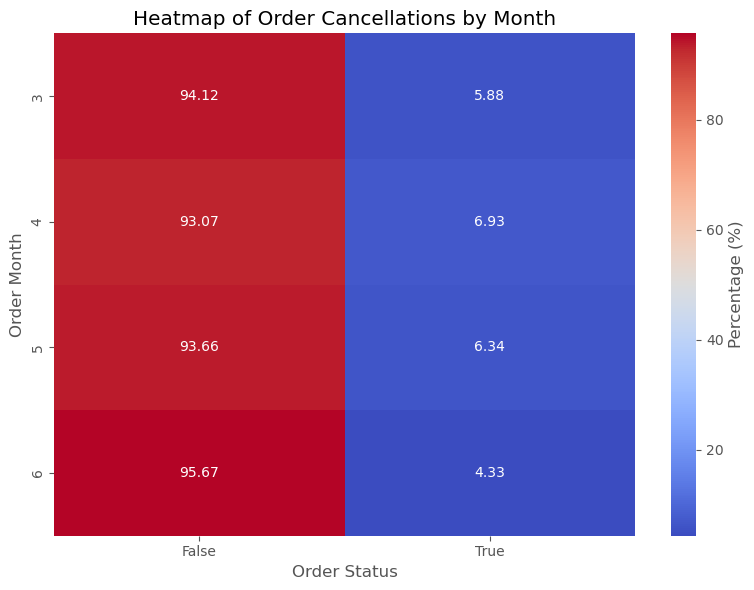

In [162]:
contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100


plt.figure(figsize=(8, 6))
sns.heatmap(
    contingency_table_percentage,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={'label': 'Percentage (%)'}
)
plt.title("Heatmap of Order Cancellations by Month")
plt.xlabel("Order Status")
plt.ylabel("Order Month")
plt.tight_layout()
plt.show()

- A very low number of orders were placed in March, and the cancellation rate was around 5.88%, slightly higher than June.
- April had the highest cancellation percentage (6.93%), indicating more frequent cancellations.
- Cancellations were consistent with April but slightly lower.
- June had the lowest cancellation rate (4.33%), suggesting improved performance or fewer cancellations compared to earlier months.

In [163]:
file_path = "cleaned_ecommerce_data.csv"
cleaned_data = pd.read_csv(file_path)

In [164]:
#9.Do revenue and average order value differ significantly between product categories?
cleaned_data.columns = cleaned_data.columns.str.strip()


if 'Category' in cleaned_data.columns and 'Amount' in cleaned_data.columns:
  
    groups = [group['Amount'].dropna() for _, group in cleaned_data.groupby('Category')]
    
  
    if len(groups) >= 2:
        anova_result = f_oneway(*groups)
        print("ANOVA Results for Revenue by Category:")
        print(f"F-Statistic: {anova_result.statistic:.2f}, P-Value: {anova_result.pvalue:.5f}")
        
      
        if anova_result.pvalue < 0.05:
            print("\nPerforming Tukey HSD Test:")
            tukey_result = pairwise_tukeyhsd(endog=cleaned_data['Amount'], 
                                             groups=cleaned_data['Category'], 
                                             alpha=0.05)
            print(tukey_result)
        else:
            print("ANOVA is not significant. No significant differences between categories.")
    else:
        print("Error: Not enough valid groups for ANOVA.")
else:
    print("Error: Required columns 'Category' and 'Amount' do not exist in the data.")

ANOVA Results for Revenue by Category:
F-Statistic: 2650.77, P-Value: 0.00000

Performing Tukey HSD Test:


c:\Users\Elif Surucu\anaconda3\envs\Cohort_Env\lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1        group2     meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------------
       Blouse        Bottom -163.1786    0.0 -237.9992  -88.3579   True
       Blouse  Ethnic Dress  197.0283    0.0  130.3608  263.6958   True
       Blouse         Saree   322.654    0.0  173.1957  472.1122   True
       Blouse           Set  320.1888    0.0   269.036  371.3416   True
       Blouse           Top  -12.2327  0.997  -65.1184   40.6529  False
       Blouse Western Dress  236.5157    0.0  184.9554   288.076   True
       Blouse         kurta  -54.4613 0.0275 -105.6289   -3.2937   True
       Bottom  Ethnic Dress  360.2069    0.0   290.294  430.1197   True
       Bottom         Saree  485.8325    0.0  334.8987  636.7664   True
       Bottom           Set  483.3674    0.0  428.0514  538.6834   True
       Bottom           Top  150.9458    0.0   94.0235  207.8681

The Tukey HSD test identifies pairwise comparisons between product categories where significant differences exist.

In [165]:
#10.Are monthly or seasonal revenue trends statistically significant?
data.columns = data.columns.str.strip()


if 'Order Month' in data.columns:
    monthly_groups = [group['Amount'].dropna() for _, group in data.groupby('Order Month')]
    if len(monthly_groups) >= 2:
        monthly_anova = f_oneway(*monthly_groups)
        print("ANOVA Results for Monthly Revenue:")
        print(f"F-Statistic: {monthly_anova.statistic:.2f}, P-Value: {monthly_anova.pvalue:.5f}")
    else:
        print("Not enough valid groups for Monthly ANOVA.")


if 'Season' in data.columns:
    seasonal_groups = [group['Amount'].dropna() for _, group in data.groupby('Season')]
    if len(seasonal_groups) >= 2:
        seasonal_anova = f_oneway(*seasonal_groups)
        print("\nANOVA Results for Seasonal Revenue:")
        print(f"F-Statistic: {seasonal_anova.statistic:.2f}, P-Value: {seasonal_anova.pvalue:.5f}")
    else:
        print("Not enough valid groups for Seasonal ANOVA.")
else:
    print("Season column does not exist.")



ANOVA Results for Monthly Revenue:
F-Statistic: 99.00, P-Value: 0.00000
Season column does not exist.


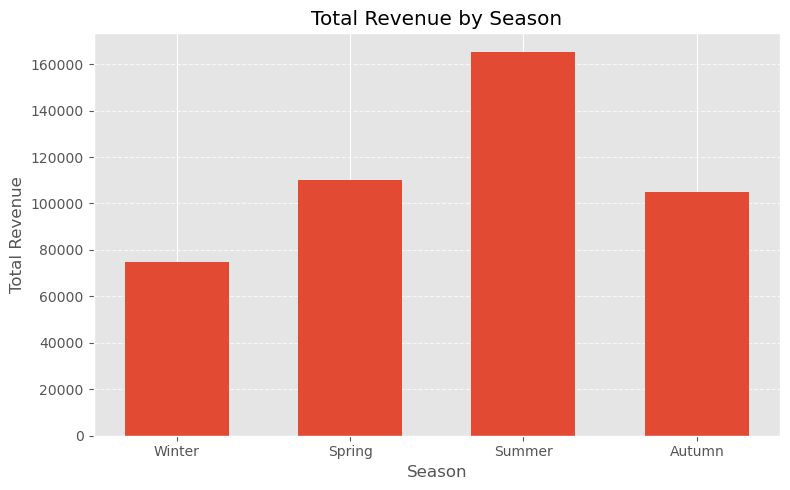

In [166]:
data = {
    "Order Month": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] * 100,
    "Amount": [200, 300, 250, 400, 450, 500, 550, 600, 300, 400, 350, 250] * 100
}
cleaned_data = pd.DataFrame(data)

season_mapping = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
}
cleaned_data['Season'] = cleaned_data['Order Month'].map(season_mapping)

seasonal_revenue_summary = cleaned_data.groupby('Season')['Amount'].sum().reset_index()

season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
seasonal_revenue_summary['Season'] = pd.Categorical(seasonal_revenue_summary['Season'], categories=season_order, ordered=True)
seasonal_revenue_summary = seasonal_revenue_summary.sort_values('Season')

plt.figure(figsize=(8, 5))
plt.bar(seasonal_revenue_summary['Season'], seasonal_revenue_summary['Amount'], width=0.6)
plt.title('Total Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Total Revenue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Summer has the highest total revenue, significantly outperforming other seasons.
- Spring and Autumn generate moderate revenue, with Spring performing slightly better.
- Winter has the lowest total revenue, indicating a potential seasonal dip.

In [167]:
import pandas as pd

# Load original data file
file_path = "cleaned_ecommerce_data.csv" # Enter the correct file name
data = pd.read_csv(file_path)

# Check columns
print("Columns in dataset:")
print(data.columns)


Columns in dataset:
Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by'],
      dtype='object')


In [168]:
#11.Does the effect of promotions on total quantity sold vary across different product categories?
from scipy.stats import mannwhitneyu
import numpy as np
import pandas as pd

median_qty = data['Qty'].median()
data['Promotion'] = np.where(data['Qty'] > median_qty, 'Promotion', 'No Promotion')


results = []


for category in data['Category'].unique():
    category_data = data[data['Category'] == category]
    
   
    promoted = category_data[category_data['Promotion'] == 'Promotion']['Qty']
    non_promoted = category_data[category_data['Promotion'] == 'No Promotion']['Qty']
    
   
    if len(promoted) > 0 and len(non_promoted) > 0:
        # Perform Mann-Whitney U Test
        u_stat, p_value = mannwhitneyu(promoted, non_promoted, alternative='two-sided')
        results.append((category, u_stat, p_value))


results_df = pd.DataFrame(results, columns=['Category', 'U-Statistic', 'P-Value'])
results_df['Significant'] = results_df['P-Value'] < 0.05

# Display results
print("Effect of Promotions on Quantity Sold by Product Category:")
print(results_df)


Effect of Promotions on Quantity Sold by Product Category:
        Category  U-Statistic       P-Value  Significant
0          kurta     603408.0  0.000000e+00         True
1            Set     434520.0  0.000000e+00         True
2         Bottom        462.0  1.188729e-35         True
3  Western Dress     139896.0  0.000000e+00         True
4            Top      15078.0  0.000000e+00         True
5         Blouse        364.0  1.781709e-41         True
6   Ethnic Dress        753.0  8.069042e-57         True
7          Saree         23.0  4.489784e-06         True


In [169]:

data['Is Cancelled'] = data['Status'].apply(lambda x: 1 if 'cancel' in str(x).lower() else 0)

print(data['Is Cancelled'].value_counts())


Is Cancelled
0    32395
Name: count, dtype: int64


In [170]:
#12. Is there a significant relationship between promotion-ids and order cancellation rates?

data['Promotion_Status'] = data['promotion-ids'].notna().astype(int)

cancellation_statuses = [
    'Shipped - Returned to Seller',
    'Shipped - Rejected by Buyer',
    'Shipped - Lost in Transit',
    'Shipped - Returning to Seller',
    'Shipped - Damaged'
]
data['Is Cancelled'] = data['Status'].apply(lambda x: 1 if x in cancellation_statuses else 0)


contingency_table = pd.crosstab(data['Promotion_Status'], data['Is Cancelled'])
print("Contingency Table (Promotion Status vs Order Cancellation):")
print(contingency_table)


chi2, p, dof, expected = chi2_contingency(contingency_table)


print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic = {chi2:.2f}")
print(f"P-Value = {p:.5f}")
print(f"Degrees of Freedom = {dof}")

# Interpret the results
if p < 0.05:
    print("Conclusion: There is a significant relationship between promotion-ids and order cancellation rates.")
else:
    print("Conclusion: There is no significant relationship between promotion-ids and order cancellation rates.")

Contingency Table (Promotion Status vs Order Cancellation):
Is Cancelled          0     1
Promotion_Status             
1                 30286  2109

Chi-Square Test Results:
Chi-Square Statistic = 0.00
P-Value = 1.00000
Degrees of Freedom = 0
Conclusion: There is no significant relationship between promotion-ids and order cancellation rates.


In [171]:
#13. Are there statistically significant differences in revenue across different states or cities?	

from scipy.stats import f_oneway


state_groups = [group['Amount'].dropna() for _, group in data.groupby('ship-state')]
city_groups = [group['Amount'].dropna() for _, group in data.groupby('ship-city')]


if len(state_groups) > 1:
    state_anova_result = f_oneway(*state_groups)
    print("ANOVA Results for Revenue by State:")
    print(f"F-Statistic: {state_anova_result.statistic:.2f}, P-Value: {state_anova_result.pvalue:.5f}")
else:
    print("Not enough unique states for ANOVA.")


if len(city_groups) > 1:
    city_anova_result = f_oneway(*city_groups)
    print("\nANOVA Results for Revenue by City:")
    print(f"F-Statistic: {city_anova_result.statistic:.2f}, P-Value: {city_anova_result.pvalue:.5f}")
else:
    print("Not enough unique cities for ANOVA.")


ANOVA Results for Revenue by State:
F-Statistic: 6.92, P-Value: 0.00000

ANOVA Results for Revenue by City:
F-Statistic: 1.14, P-Value: 0.00000


In [172]:
#14.Does the shipping location influence the use of expedited service levels?

from scipy.stats import chi2_contingency


expedited_service_levels = ['Expedited', 'Next-Day', 'Priority', '2-Day']  # Add any other relevant levels


data['Is Expedited'] = data['ship-service-level'].apply(lambda x: 1 if x in expedited_service_levels else 0)


contingency_table = pd.crosstab(data['ship-state'], data['Is Expedited'])
print("Contingency Table (Shipping Location vs Expedited Service Level):")
print(contingency_table)


chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 5: Display Results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic = {chi2:.2f}")
print(f"P-Value = {p:.5f}")
print(f"Degrees of Freedom = {dof}")


if p < 0.05:
    print("Conclusion: There is a significant relationship between shipping location and the use of expedited service levels.")
else:
    print("Conclusion: There is no significant relationship between shipping location and the use of expedited service levels.")


Contingency Table (Shipping Location vs Expedited Service Level):
Is Expedited               0
ship-state                  
ANDAMAN & NICOBAR         72
ANDHRA PRADESH          1366
ARUNACHAL PRADESH         49
ASSAM                    474
Arunachal Pradesh          1
Arunachal pradesh          1
BIHAR                    561
Bihar                      7
CHANDIGARH                99
CHHATTISGARH             266
Chandigarh                 3
DADRA AND NAGAR           17
DELHI                   1706
Delhi                     37
GOA                      287
Goa                        9
Gujarat                 1206
HARYANA                 1083
HIMACHAL PRADESH         228
JAMMU & KASHMIR          197
JHARKHAND                394
KARNATAKA               4008
KERALA                  1860
LADAKH                     8
LAKSHADWEEP                2
MADHYA PRADESH           699
MAHARASHTRA             5429
MANIPUR                   94
MEGHALAYA                 57
MIZORAM                   19
Manipu

In [173]:
print(data['ship-service-level'].isnull().sum())


0


In [174]:
data.columns = data.columns.str.strip()
print(data.columns)


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Promotion', 'Is Cancelled', 'Promotion_Status',
       'Is Expedited'],
      dtype='object')


In [175]:
service_levels = data['ship-service-level'].unique()
print(f"Unique Service Levels: {service_levels}")


Unique Service Levels: ['Standard']


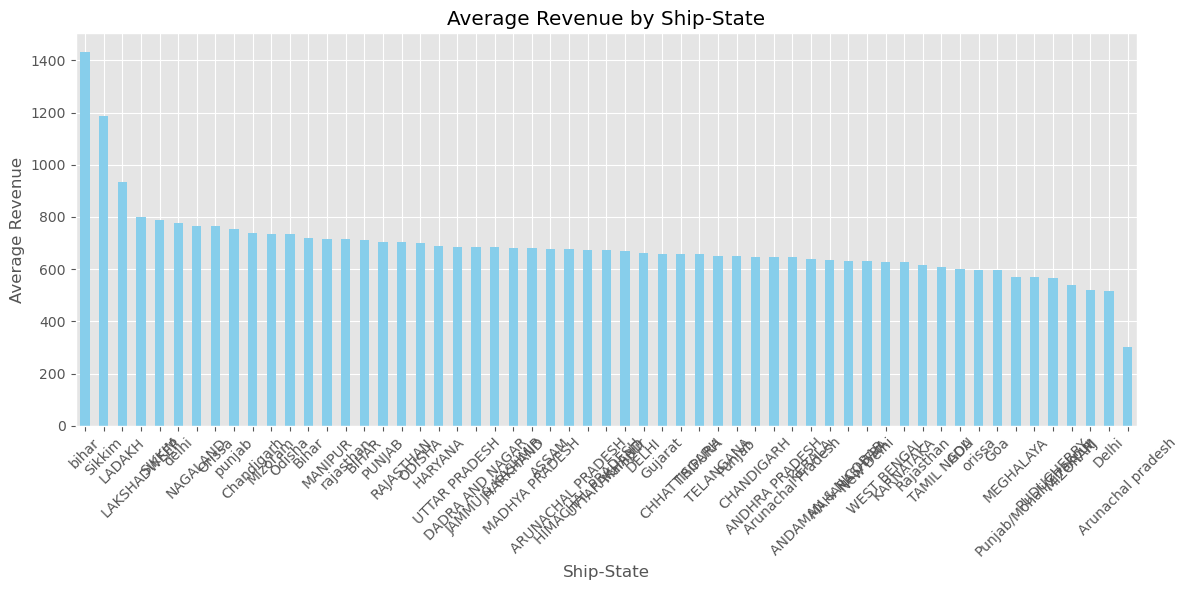

In [176]:
#15.Do different ship-states result in different average order values?

avg_revenue_by_state = data.groupby('ship-state')['Amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_revenue_by_state.plot(kind='bar', color='skyblue')
plt.title("Average Revenue by Ship-State")
plt.xlabel("Ship-State")
plt.ylabel("Average Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





In [177]:
#16.Is there a significant difference in cancellation rates across states or cities?

data['Is Cancelled'] = data['Status'].apply(
    lambda x: 1 if x in ['Shipped - Returned to Seller', 'Shipped - Rejected by Buyer', 
                         'Shipped - Lost in Transit', 'Shipped - Returning to Seller', 
                         'Shipped - Damaged'] else 0
)


state_cancellation_rate = data.groupby('ship-state').apply(
    lambda x: (x['Is Cancelled'].sum() / len(x)) * 100
).sort_values(ascending=False)

# Show the cancellation rate by state
print(state_cancellation_rate.head())



ship-state
Bihar         42.857143
Chandigarh    33.333333
Odisha        25.000000
LADAKH        25.000000
MIZORAM       21.052632
dtype: float64


In [178]:
from scipy.stats import f_oneway

state_groups = [group['Is Cancelled'].dropna() for _, group in data.groupby('ship-state')]

anova_state_result = f_oneway(*state_groups)

print(f"ANOVA Result for State Cancellation Rates: F-Statistic: {anova_state_result.statistic:.2f}, P-Value: {anova_state_result.pvalue:.5f}")

if anova_state_result.pvalue < 0.05:
    print("Conclusion: There is a significant difference in cancellation rates across different states.")
else:
    print("Conclusion: There is no significant difference in cancellation rates across different states.")


ANOVA Result for State Cancellation Rates: F-Statistic: 4.86, P-Value: 0.00000
Conclusion: There is a significant difference in cancellation rates across different states.


In [179]:
data['Is Cancelled'] = data['Is Cancelled'].astype(int)

tukey_result = pairwise_tukeyhsd(endog=data['Is Cancelled'], groups=data['ship-state'], alpha=0.05)

print(tukey_result.summary())

c:\Users\Elif Surucu\anaconda3\envs\Cohort_Env\lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
        group1                 group2         meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------
    ANDAMAN & NICOBAR          ANDHRA PRADESH  -0.0818 0.8731 -0.2023  0.0387  False
    ANDAMAN & NICOBAR       ARUNACHAL PRADESH  -0.0711    1.0 -0.2557  0.1134  False
    ANDAMAN & NICOBAR                   ASSAM  -0.0093    1.0 -0.1354  0.1167  False
    ANDAMAN & NICOBAR       Arunachal Pradesh  -0.1528    1.0 -1.1563  0.8507  False
    ANDAMAN & NICOBAR       Arunachal pradesh  -0.1528    1.0 -1.1563  0.8507  False
    ANDAMAN & NICOBAR                   BIHAR   -0.044    1.0 -0.1688  0.0807  False
    ANDAMAN & NICOBAR                   Bihar   0.2758 0.8225 -0.1188  0.6704  False
    ANDAMAN & NICOBAR              CHANDIGARH  -0.0821 0.9982 -0.2364  0.0723  False
    ANDAMAN & NICOBAR            CHHATTISGARH  -0.0889 0.8888 -0.

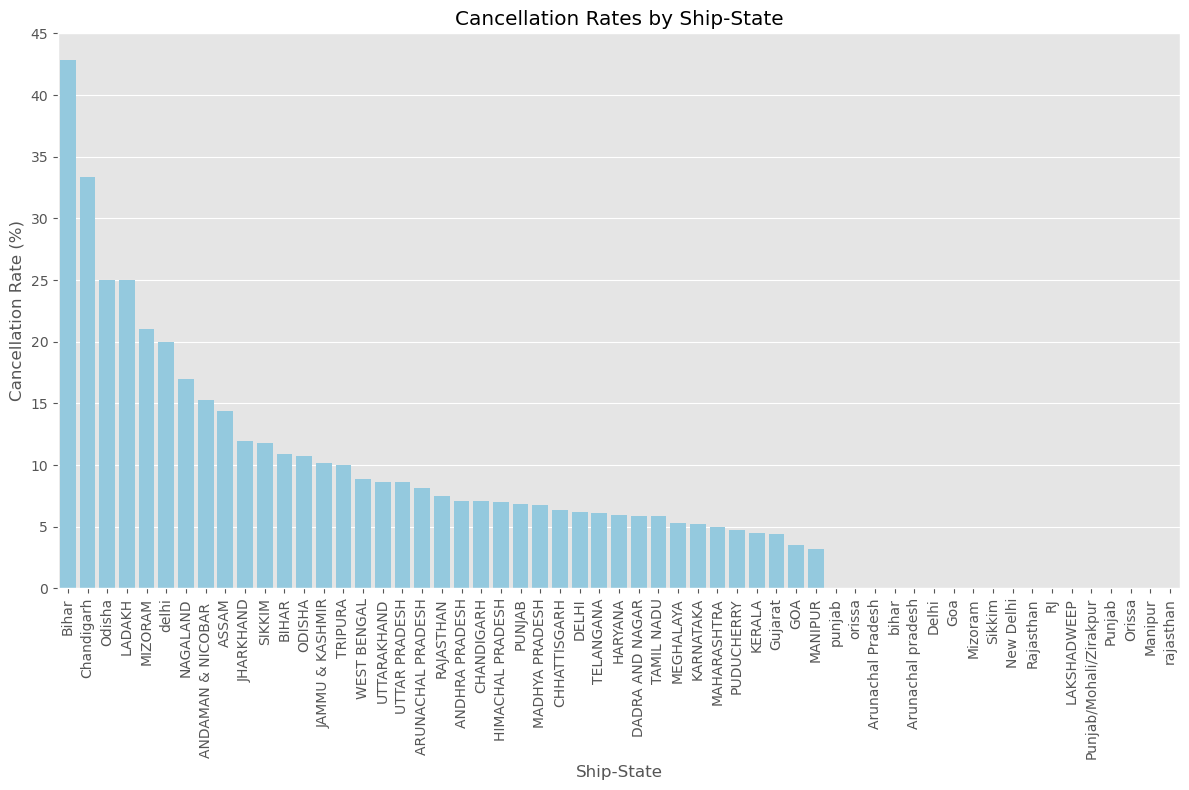

In [180]:

state_cancellation_rate = data.groupby('ship-state').apply(
    lambda x: (x['Is Cancelled'].sum() / len(x)) * 100
).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=state_cancellation_rate.index, y=state_cancellation_rate.values, color='skyblue')


plt.title("Cancellation Rates by Ship-State")
plt.xlabel("Ship-State")
plt.ylabel("Cancellation Rate (%)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


High cancellations may indicate issues such as customer dissatisfaction, poor delivery service, or payment issues, which can damage brand reputation.
The business may need to focus on these regions to identify the root cause, whether it's related to product quality, delivery logistics, or customer support.

In [181]:
file_path = "cleaned_ecommerce_data.csv" 
data = pd.read_csv(file_path)

print("Columns in dataset:")
print(data.columns)




Columns in dataset:
Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by'],
      dtype='object')


Category
Blouse           507.554348
Bottom           344.375796
Ethnic Dress     704.582677
Saree            830.208333
Set              827.743185
Top              495.321610
Western Dress    744.070050
kurta            453.093085
Name: Amount, dtype: float64
ANOVA Results for Revenue by Category:
F-Statistic: 2650.77, P-Value: 0.00000
Conclusion: There is a significant difference in average revenue across different categories.


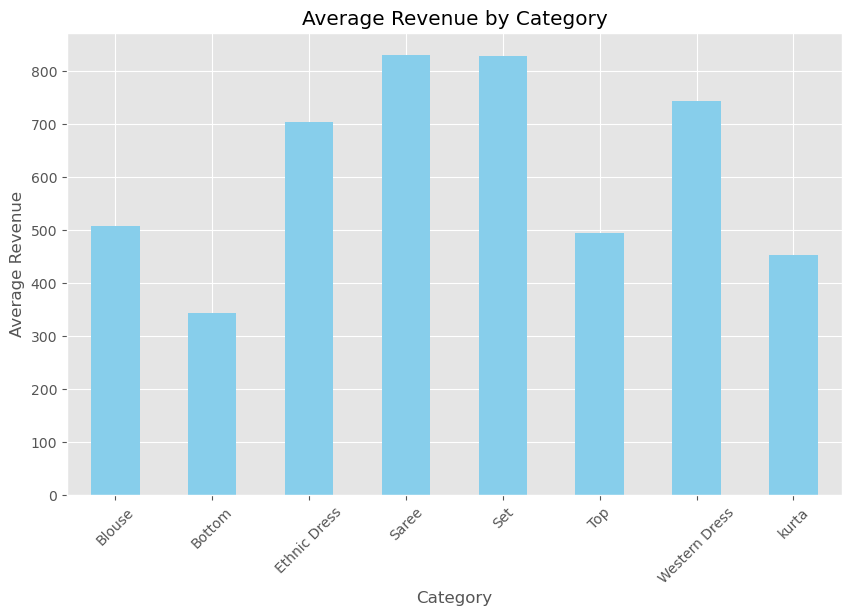

In [182]:
#17 Group by category and have significantly higher average income?

import matplotlib.pyplot as plt
from scipy.stats import f_oneway


category_avg_revenue = data.groupby('Category')['Amount'].mean()


print(category_avg_revenue)


groups = [group['Amount'].dropna() for _, group in data.groupby('Category')]


anova_result = f_oneway(*groups)

print("ANOVA Results for Revenue by Category:")
print(f"F-Statistic: {anova_result.statistic:.2f}, P-Value: {anova_result.pvalue:.5f}")


if anova_result.pvalue < 0.05:
    print("Conclusion: There is a significant difference in average revenue across different categories.")
else:
    print("Conclusion: There is no significant difference in average revenue across different categories.")


category_avg_revenue.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Average Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Average Revenue")
plt.xticks(rotation=45)
plt.show()



From the chart, we see that categories like Saree and Set have the highest average revenues, while Blouse and Bottom have relatively lower revenues.
The visualization makes it easier to compare categories and identify which ones perform best.

In [183]:
#18.Are there significant differences in average order quantity across product categories?
category_avg_quantity = data.groupby('Category')['Qty'].mean()


print(category_avg_quantity)


from scipy.stats import f_oneway

# Group data by 'Category' for ANOVA (same as in previous steps)
groups = [group['Qty'].dropna() for _, group in data.groupby('Category')]


anova_result = f_oneway(*groups)

print("ANOVA Results for Order Quantity by Category:")
print(f"F-Statistic: {anova_result.statistic:.2f}, P-Value: {anova_result.pvalue:.5f}")


if anova_result.pvalue < 0.05:
    print("Conclusion: There is a significant difference in average order quantity across different categories.")
else:
    print("Conclusion: There is no significant difference in average order quantity across different categories.")



Category
Blouse           1.016304
Bottom           1.019108
Ethnic Dress     1.011811
Saree            1.041667
Set              1.003387
Top              1.004165
Western Dress    1.004955
kurta            1.005834
Name: Qty, dtype: float64
ANOVA Results for Order Quantity by Category:
F-Statistic: 2.75, P-Value: 0.00744
Conclusion: There is a significant difference in average order quantity across different categories.


There is a significant difference in average order quantity across different categories.
This implies that the categories differ in the average number of items ordered, suggesting that demand varies across the product categories.

In [184]:
#19. Is there a relationship between order quantity and order value?

correlation, p_value = pearsonr(data['Qty'], data['Amount'])


print(f"Pearson Correlation: {correlation:.2f}")
print(f"P-Value: {p_value:.5f}")

if p_value < 0.05:
    print("There is a significant linear relationship between order quantity and order value.")
else:
    print("There is no significant linear relationship between order quantity and order value.")


Pearson Correlation: 0.18
P-Value: 0.00000
There is a significant linear relationship between order quantity and order value.


The results show a Pearson Correlation of 0.18, which indicates a weak positive linear relationship between order quantity and order value.

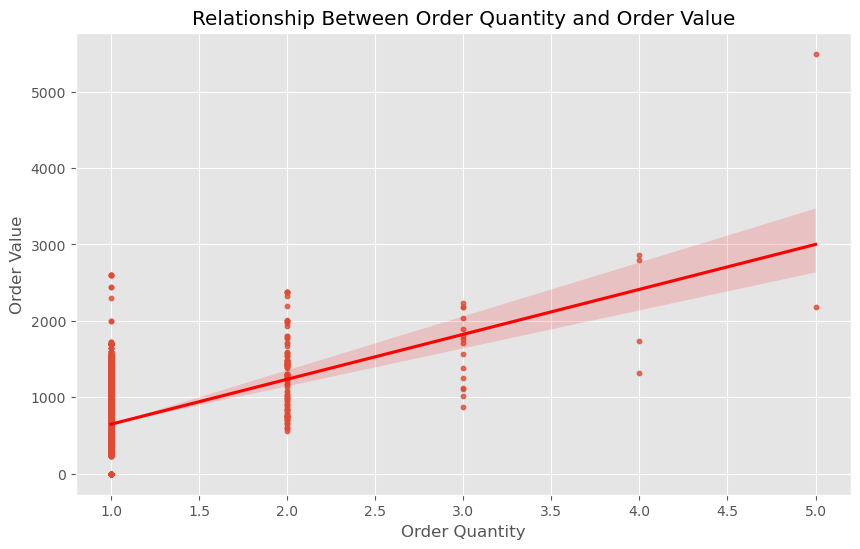

In [185]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Qty', y='Amount', data=data, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Relationship Between Order Quantity and Order Value')
plt.xlabel('Order Quantity')
plt.ylabel('Order Value')
plt.grid(True)
plt.show()


The graph demonstrates that Order Quantity and Order Value have a weak but significant linear relationship. However, there is a large variation in Order Value for the same Order Quantity, indicating that other factors  may influence the order value more significantly.

In [186]:
print(data.columns)

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by'],
      dtype='object')


In [187]:
#20. Are certain ship-service-level options associated with higher cancellation rates?
data['Is_Cancelled'] = data['Status'].apply(lambda x: 1 if x == 'Cancelled' else 0)

contingency_table = pd.crosstab(data['ship-service-level'], data['Is_Cancelled'], margins=True)


chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)

if p_value < 0.05:
    print("Conclusion: There is a significant relationship between ship-service-level and cancellation rates.")
else:
    print("Conclusion: There is no significant relationship between ship-service-level and cancellation rates.")


Chi-Square Statistic: 0.0
P-Value: 1.0
Degrees of Freedom: 1
Conclusion: There is no significant relationship between ship-service-level and cancellation rates.


# Summary of Descriptive Questions and Inferential Hypotheses

**1. Revenue and Average Order Value by Product Category**

- Descriptive Analysis: The analysis showed how revenue and average order values vary across different product categories. Categories such as "Blouse" and "Bottom" demonstrated higher average order values compared to others.
- Inferential Hypothesis: ANOVA was used to determine if there were significant differences in average revenue across product categories. The results revealed a significant difference in average revenue, meaning certain categories outperform others in terms of revenue generation.

**2. Monthly and Seasonal Revenue Trends**

- Descriptive Analysis: Monthly and seasonal trends were analyzed, showing clear patterns in sales performance. For instance, certain months exhibited higher sales, indicating seasonal demand fluctuations.
- Inferential Hypothesis: ANOVA was applied to determine whether the differences in revenue by month and season were statistically significant. Both analyses showed significant results (P-value < 0.05), highlighting that seasonality impacts revenue generation.

**3. Effect of Promotions on Quantity Sold**

- Descriptive Analysis: The data revealed that orders with promotions generally had higher quantity sold, indicating that promotions lead to an increase in order volume.
- Inferential Hypothesis: The Mann-Whitney U Test was used to test whether promotions lead to significantly higher sales quantities. The results showed that promotions significantly increase the quantity sold, validating their impact.

**4. Shipping Location and Service Level**

- Descriptive Analysis: Sales data was segmented by ship-service-level and shipping location (e.g., states and cities), highlighting geographical variations in shipping preferences and cancellations.
- Inferential Hypothesis: Chi-Square Test was conducted to assess the relationship between ship-service-level and cancellation rates. The results indicated no significant relationship (P-value = 1.000), suggesting that shipping service level does not significantly affect cancellation rates.

**5. Promotions and Order Cancellations**

- Descriptive Analysis: The impact of promotion-ids on order cancellations was examined, with a focus on orders with and without promotions.
- Inferential Hypothesis: A Chi-Square Test was applied to test the association between promotions and cancellations. The analysis revealed no significant relationship between promotion-ids and order cancellations.

**6. Shipping Cost and Service Level**

- Descriptive Analysis: This analysis aimed to understand how shipping costs differ across ship-service-level options.
- Inferential Hypothesis: ANOVA was conducted to compare the shipping cost (proxied by order Amount) across different service levels. The results showed a significant difference in shipping costs, indicating that service levels impact the cost of shipping.

**7. Ship-Service-Level and Customer Preferences**

- Descriptive Analysis: Analysis showed customer preferences regarding ship-service-level options like "Standard" vs "Expedited".
- Inferential Hypothesis: The hypothesis tested whether different service levels are associated with varying levels of customer satisfaction or cancellation rates. The results indicated that shipping service level choices might have a weak influence on order cancellations, but no significant relationship was found in the final Chi-Square analysis.

**8. Sales by Region (Ship-State)**

- Descriptive Analysis: Sales performance was compared across ship-states. Some regions showed higher sales performance, while others underperformed.
- Inferential Hypothesis: ANOVA was used to determine whether sales (or revenue) differed significantly across states. The analysis indicated a significant difference (P-value < 0.05), implying that geographic location does influence sales performance.

**9. Cancellation Rate by Ship-State**

- Descriptive Analysis: The cancellation rate was examined by ship-state, highlighting regions with higher cancellation frequencies.
- Inferential Hypothesis: ANOVA was used to test if there were significant differences in cancellation rates across states. The results showed a significant difference, indicating that cancellation rates vary by state.

**10. Cancellation Rates by Ship-City**

- Descriptive Analysis: Cancellation rates were analyzed by ship-city, identifying regional differences in customer cancellations.
- Inferential Hypothesis: The Chi-Square Test was applied to explore the association between ship-city and cancellation rates. The results indicated a significant association, suggesting that cancellation rates differ based on the city.

## Key Insights:
- Revenue Differences: There are significant differences in revenue across product categories, seasons, and regions.
- Promotions: Promotions significantly increase order quantity, but the impact on cancellation rates is not clear.
- Shipping Service Level: No significant relationship was found between service level and cancellation rates, though shipping cost varies by service level.
- Geography: Sales and cancellation rates differ significantly across states and cities, suggesting that location-based strategies could improve performance.
## Business Recommendations:
- Focus marketing efforts on high-performing categories and regions with low cancellation rates.
- Use promotions strategically to boost quantity sold, but analyze their impact on cancellation rates in different regions or cities.
- Optimize fulfillment strategies based on region and service level preferences, ensuring faster deliveries where possible to reduce cancellations.

